# 액션영화 흥행 비율

In [128]:
import pandas as pd
import numpy as np
import seaborn as sns

In [31]:
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False  # minus 표시
plt.rc('font', family='Malgun Gothic')

In [32]:
# 이상치 제거 파일 2003-2022 파일 전체 국적 비교 

In [33]:
file_path = "(완)[KOBIS] 박스오피스_일별(2003~2022)_장르_수정.csv"
mv_all = pd.read_csv(file_path)
mv_all
file_path2 = '누적관객수_백만명_이상_766개.csv'
mv_million = pd.read_csv(file_path2)

In [34]:
mv_million

,순위,영화명,개봉일,등급,장르,대표국적,국적,제작사,배급사,감독,배우,기준일,매출액,누적매출액,관객수,누적관객수,스크린수,상영횟수
0,34,명량,2014-07-30,15세이상관람가,"사극,액션",한국,한국,(주)빅스톤픽쳐스,(주)씨제이이엔엠,김한민,"최민식,류승룡,조진웅,김명곤,진구,이정현,권율,노민우,이승준,오타니 료헤이,박보검,...",2014-07-20,1428000,1428000,238,238,1,1
1,7,명량,2014-07-30,15세이상관람가,"사극,액션",한국,한국,(주)빅스톤픽쳐스,(주)씨제이이엔엠,김한민,"최민식,류승룡,조진웅,김명곤,진구,이정현,권율,노민우,이승준,오타니 료헤이,박보검,...",2014-07-21,44016000,45444000,5369,5607,18,28
2,22,명량,2014-07-30,15세이상관람가,"사극,액션",한국,한국,(주)빅스톤픽쳐스,(주)씨제이이엔엠,김한민,"최민식,류승룡,조진웅,김명곤,진구,이정현,권율,노민우,이승준,오타니 료헤이,박보검,...",2014-07-22,4416000,49860000,552,6159,37,38
3,9,명량,2014-07-30,15세이상관람가,"사극,액션",한국,한국,(주)빅스톤픽쳐스,(주)씨제이이엔엠,김한민,"최민식,류승룡,조진웅,김명곤,진구,이정현,권율,노민우,이승준,오타니 료헤이,박보검,...",2014-07-23,6696000,56556000,837,6996,4,4
4,9,명량,2014-07-30,15세이상관람가,"사극,액션",한국,한국,(주)빅스톤픽쳐스,(주)씨제이이엔엠,김한민,"최민식,류승룡,조진웅,김명곤,진구,이정현,권율,노민우,이승준,오타니 료헤이,박보검,...",2014-07-24,14979000,71535000,1890,8886,8,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65789,58,스카이스크래퍼,2018-07-11,12세이상관람가,"액션,스릴러",미국,미국,NaN,유니버설픽쳐스인터내셔널 코리아(유),로슨 마샬 터버,"드웨인 존슨,파블로 쉬레이버,니브 캠벨,바이런 만,친 한",2018-08-24,496000,8610218718,65,1002606,2,2
65790,59,스카이스크래퍼,2018-07-11,12세이상관람가,"액션,스릴러",미국,미국,NaN,유니버설픽쳐스인터내셔널 코리아(유),로슨 마샬 터버,"드웨인 존슨,파블로 쉬레이버,니브 캠벨,바이런 만,친 한",2018-08-25,503000,8610721718,66,1002672,2,2
65791,49,스카이스크래퍼,2018-07-11,12세이상관람가,"액션,스릴러",미국,미국,NaN,유니버설픽쳐스인터내셔널 코리아(유),로슨 마샬 터버,"드웨인 존슨,파블로 쉬레이버,니브 캠벨,바이런 만,친 한",2018-08-26,483000,8611204718,65,1002737,2,2
65792,46,스카이스크래퍼,2018-07-11,12세이상관람가,"액션,스릴러",미국,미국,NaN,유니버설픽쳐스인터내셔널 코리아(유),로슨 마샬 터버,"드웨인 존슨,파블로 쉬레이버,니브 캠벨,바이런 만,친 한",2018-08-27,457000,8611661718,61,1002798,2,2


In [35]:
mv_all

,순위,영화명,개봉일,등급,장르,대표국적,국적,제작사,배급사,감독,배우,기준일,매출액,누적매출액,관객수,누적관객수,스크린수,상영횟수
0,1,동갑내기 과외하기,2003-02-07,12세관람가,코미디,한국,한국,코리아 엔터테인먼트,CJ ENM,김경형,"김하늘,권상우,공유,김지우,백일섭,김혜옥,김자옥,오승근,이성진,손영민,송병철,신지현...",2003-01-12,633500,633500,102,102,1,1
1,1,매트릭스3 레볼루션,2003-11-05,15세관람가,"SF,액션,범죄",미국,미국,NaN,워너브러더스 코리아(주),"릴리 워쇼스키,라나 워쇼스키","키아누 리브스,로렌스 피쉬번,캐리 앤 모스",2003-11-11,7676000,7676000,870,870,6,16
2,2,위대한 유산,2003-10-24,15세관람가,코미디,한국,한국,CJ ENM,CJ ENM,오상훈,"김선아,임창정,최무인,송은정,홍금봉,신성아,김대중,오유진,유순철,신이,모지은,김기천...",2003-11-11,1658000,1658000,177,177,1,3
3,3,황산벌,2003-10-17,15세관람가,코미디,한국,한국,(주)씨네월드,(주)씨네월드,이준익,"박중훈,정진영,오지명,김병철,김선아,김윤태,이문식,조대은,김만수,김현두,나수원,조철...",2003-11-11,1257000,1257000,116,116,1,3
4,4,아이덴티티,2003-10-31,15세관람가,"범죄,스릴러",미국,미국,콜럼비아트라이스타,콜럼비아트라이스타,제임스 맨골드,"존 쿠삭,레이 리오타",2003-11-11,821000,821000,102,102,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482747,34,애프터 양,2022-06-01,전체관람가,"드라마,SF",미국,미국,NaN,"(주)영화특별시에스엠씨,주식회사 왓챠",코고나다,콜린 파렐,2022-12-31,629910,389758300,90,40233,1,1
482748,31,더 메뉴,2022-12-07,15세이상관람가,스릴러,미국,미국,NaN,월트디즈니컴퍼니코리아 유한책임회사,마크 미로드,"랄프 파인즈,안야 테일러 조이,니콜라스 홀트,자넷 맥티어,주디스 라이트,존 레귀자모",2022-12-31,1047000,320680200,107,31360,3,3
482749,28,양자경의 더 모든 날 모든 순간,2022-11-23,15세이상관람가,"액션,코미디",미국,미국,NaN,워터홀컴퍼니(주),"다니엘 콴,다니엘 쉐이너트","양자경,스테파니 수,키 호이 콴,제이미 리 커티스",2022-12-31,2703789,291016371,276,27325,7,8
482750,26,캐리와 슈퍼콜라,2023-01-18,전체관람가,애니메이션,한국,한국,(주)캐리소프트,롯데컬처웍스(주)롯데엔터테인먼트,"오성윤,이춘백","최정윤,엄상현,이다은,원옥화,정주원,이창민,한상태,김지정,강나후,김신비,소경호",2022-12-31,3993000,3993000,295,295,1,1


In [36]:
mv_all['개봉일'] = pd.to_datetime(mv_all['개봉일'], format='%Y-%m-%d')
mv_all['기준일'] = pd.to_datetime(mv_all['기준일'], format='%Y-%m-%d')
mv_million['개봉일'] = pd.to_datetime(mv_million['개봉일'], format='%Y-%m-%d')
mv_million['기준일'] = pd.to_datetime(mv_million['기준일'], format='%Y-%m-%d')

In [37]:
# 코드 짜는중...

In [38]:
mv_all_sorted = mv_all.sort_values(['기준일','순위'], ascending=False)
mv_all_sorted
mv_million_sorted = mv_million.sort_values(['기준일','순위'], ascending=False)
mv_million_sorted

,순위,영화명,개봉일,등급,장르,대표국적,국적,제작사,배급사,감독,배우,기준일,매출액,누적매출액,관객수,누적관객수,스크린수,상영횟수
38477,73,블랙 팬서: 와칸다 포에버,2022-11-09,12세이상관람가,"액션,어드벤처,드라마",미국,미국,NaN,월트디즈니컴퍼니코리아 유한책임회사,라이언 쿠글러,"레티티아 라이트,루피타 뇽오,다네이 거라이라,마틴 프리먼,다니엘 칼루야,안젤라 바셋...",2022-12-31,102000,22203069405,8,2105641,1,1
20256,48,너의 이름은.,2017-01-04,12세이상관람가,"애니메이션,드라마,멜로/로맨스",일본,일본,NaN,플러스엠 엔터테인먼트,신카이 마코토,"카미키 류노스케,카미시라이시 모네,나가사와 마사미,이치하라 에수코,유키 아오이,시마...",2022-12-31,295000,30649461917,38,3796229,3,3
21280,37,라라랜드,2016-12-07,12세이상관람가,"드라마,뮤지컬,멜로/로맨스",미국,미국,NaN,판씨네마(주),데이미언 셔젤,"엠마 스톤,라이언 고슬링,핀 위트록,J.K. 시몬스,로즈마리 드윗",2022-12-31,873000,31079372508,83,3767032,3,3
42563,25,헤어질 결심,2022-06-29,15세이상관람가,"미스터리,멜로/로맨스",한국,한국,모호필름,(주)씨제이이엔엠,박찬욱,"박해일,탕웨이,이정현,고경표,김신영,정영숙,유승목,서현우,정이서,이학주,정소리,신안...",2022-12-31,2749310,19642291589,297,1893954,6,9
25450,5,올빼미,2022-11-23,15세이상관람가,스릴러,한국,한국,"(주)씨제스엔터테인먼트,(주)영화사 담담",(주)넥스트엔터테인먼트월드(NEW),안태진,"류준열,유해진,최무성,조성하,박명훈,김성철,안은진,조윤서,김상욱,이주원,김예은,정석...",2022-12-31,308873990,31769067550,30318,3222767,456,690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45933,1,실미도,2003-12-24,15세관람가,전쟁,한국,한국,(주)시네마서비스,(주)시네마서비스,강우석,"설경구,안성기,허준호,정재영,임원희,강성진,강신일,이도겸,엄태웅,김강우,이효정,석재...",2003-12-26,104087000,466688000,17411,73988,15,96
45932,1,실미도,2003-12-24,15세관람가,전쟁,한국,한국,(주)시네마서비스,(주)시네마서비스,강우석,"설경구,안성기,허준호,정재영,임원희,강성진,강신일,이도겸,엄태웅,김강우,이효정,석재...",2003-12-25,144917500,362601000,22498,56577,15,103
45931,1,실미도,2003-12-24,15세관람가,전쟁,한국,한국,(주)시네마서비스,(주)시네마서비스,강우석,"설경구,안성기,허준호,정재영,임원희,강성진,강신일,이도겸,엄태웅,김강우,이효정,석재...",2003-12-24,135958000,217683500,21361,34079,15,104
45930,2,실미도,2003-12-24,15세관람가,전쟁,한국,한국,(주)시네마서비스,(주)시네마서비스,강우석,"설경구,안성기,허준호,정재영,임원희,강성진,강신일,이도겸,엄태웅,김강우,이효정,석재...",2003-12-23,71104000,81725500,11123,12718,14,78


In [39]:
mv_all_gp = mv_all_sorted.loc[mv_all_sorted.groupby(['영화명', '개봉일'])['기준일'].idxmax()]
mv_all_gp

,순위,영화명,개봉일,등급,장르,대표국적,국적,제작사,배급사,감독,배우,기준일,매출액,누적매출액,관객수,누적관객수,스크린수,상영횟수
409054,29,#살아있다,2020-06-24,15세이상관람가,드라마,한국,한국,"영화사 집,(주)퍼스펙티브픽쳐스",롯데컬처웍스(주)롯데엔터테인먼트,조일형,"유아인,박신혜,전배수,고나영,권용채,김경태,김다영,김단비,김라희,김미래,김미래,김윤...",2020-10-28,2890000,15968219900,289,1903992,2,2
420077,57,#아이엠히어,2021-01-14,12세이상관람가,"멜로/로맨스,코미디",프랑스,프랑스,NaN,(주)넥스트엔터테인먼트월드(NEW),에릭 라티고,"알랭 샤바,배두나,이명자,선종남,김자금,강현중,정윤하,송경의,엄지만,남승화,이지민,...",2021-02-09,82000,136875710,11,16404,6,6
478854,51,#위왓치유,2021-06-03,청소년관람불가,다큐멘터리,기타,기타,NaN,찬란,"바르보라 차르포바,비트 클루삭",NaN,2022-11-22,288000,16759950,48,1908,1,1
284094,108,...ing,2003-11-28,12세관람가,"드라마,멜로/로맨스",한국,한국,드림맥스(주),(주)튜브엔터테인먼트,이언희,"임수정,김래원,이미숙,김지영,김현수,박혜연,장미,이성경,박소연,김순애,최덕문,김인문...",2017-03-19,5000,217487000,1,34308,1,1
362083,84,0.0MHz,2019-05-29,15세이상관람가,공포(호러),한국,한국,(주)제이엠컬쳐스,(주)스마일이엔티,유선동,"정은지,이성열,최윤영,신주환,정원창,박명신,남관효,박대희,노혜영,서진석,김대현,신승...",2019-06-28,84000,1088258860,12,137294,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427292,90,"힘내세요, 병헌씨",2013-06-27,15세이상관람가,"코미디,드라마",한국,한국,NaN,㈜인디스토리,이병헌,"홍완표,양현민,김영현,허준석,이재광,이창한,정현정,조휘상,강호규,강호규,김수완,황인...",2021-04-21,7000,28862600,1,3980,1,1
379736,15,"힘을 내요, 미스터 리",2019-09-11,12세이상관람가,"코미디,드라마",한국,한국,"(주)용필름,(주)덱스터스튜디오",(주)넥스트엔터테인먼트월드(NEW),이계벽,"차승원,엄채영,박해준,김혜옥,안길강,전혜빈,류한비,조한철,성지루,김법래,정원중,신현...",2019-12-28,10950000,9930518906,1095,1181960,5,5
238564,99,힙스터: 안개의 덫,2015-10-21,청소년관람불가,"멜로/로맨스,드라마",한국,한국,(주)마부엔터테인먼트,고구마콘텐츠허브(주),강명진,"유사라,김동윤,정종우,류아진,박민규,강인화",2015-10-21,5000,5000,1,1,1,1
43736,59,힛쳐,2007-08-01,청소년관람불가,"액션,범죄,스릴러",미국,미국,NaN,(주)씨지브이신도림,데이브 메이어스,"숀 빈,소피아 부시,자크리 나이튼,닐 맥도노프",2007-08-13,7000,153080000,1,23025,1,1


In [40]:
mv_all_gp_2003=mv_all_gp[(mv_all_gp['개봉일']>'2003-01-01')&(mv_all_gp['개봉일']<'2008-01-01')]
mv_all_gp_2003

,순위,영화명,개봉일,등급,장르,대표국적,국적,제작사,배급사,감독,배우,기준일,매출액,누적매출액,관객수,누적관객수,스크린수,상영횟수
284094,108,...ing,2003-11-28,12세관람가,"드라마,멜로/로맨스",한국,한국,드림맥스(주),(주)튜브엔터테인먼트,이언희,"임수정,김래원,이미숙,김지영,김현수,박혜연,장미,이성경,박소연,김순애,최덕문,김인문...",2017-03-19,5000,217487000,1,34308,1,1
107547,46,007 카지노 로얄,2006-12-21,15세이상관람가,액션,미국,미국,NaN,한국소니픽쳐스릴리징브에나비스타영화㈜,마틴 캠벨,다니엘 크레이그,2010-07-12,-14000,6267161700,-2,1012085,1,1
66290,43,13 자메티,2007-06-29,청소년관람불가,스릴러,프랑스,프랑스,NaN,(주)이모션픽처스,겔라 바블루아니,"게오르기 바블루아니,오를레앙 르코앵",2008-08-18,20000,6120000,4,913,2,2
438629,95,13구역,2006-08-24,15세관람가,"액션,SF",프랑스,프랑스,"까날 플러스,TF1 필름 프로덕션",(주)프라임엔터테인먼트,피에르 모렐,"시릴 라파엘리,데이빗 벨",2021-08-23,2000,1416117000,2,222570,2,2
67216,43,1408,2007-08-01,15세이상관람가,"공포(호러),스릴러",미국,미국,디멘션 필름즈,롯데쇼핑㈜롯데엔터테인먼트,미카엘 하프스트롬,"존 쿠삭,사무엘 L. 잭슨",2008-09-02,96000,1641210000,24,252878,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1922,18,히달고,2004-03-19,12세관람가,액션,미국,미국,터치스톤 픽처스,한국소니픽쳐스릴리징브에나비스타영화㈜,조 존스톤,"줄레이카 로빈슨,비고 모텐슨,오마 샤리프",2004-04-08,40000,188771000,10,29703,1,3
420347,51,히든,2006-03-30,15세관람가,스릴러,프랑스,프랑스,NaN,"(주)영화사 안다미로,(주)스폰지이엔티",미카엘 하네케,"줄리엣 비노쉬,다니엘 오떼유",2021-02-12,137000,20288500,23,3004,1,1
50290,56,히어로,2007-11-01,12세이상관람가,드라마,일본,일본,NaN,롯데쇼핑㈜롯데엔터테인먼트,스즈키 마사유키,"기무라 다쿠야,마츠 다카코",2007-12-05,0,1581123000,0,245782,1,1
189673,62,히트맨,2007-11-29,청소년관람불가,"액션,범죄",미국,미국,NaN,이십세기폭스필름코퍼레이션,자비에르 젠스,"티모시 올리펀트,더그레이 스콧",2014-01-21,200000,1096259000,40,164014,1,1


In [41]:
mv_all_gp_2008=mv_all_gp[(mv_all_gp['개봉일']>'2008-01-01')&(mv_all_gp['개봉일']<'2013-01-01')]
mv_all_gp_2008

,순위,영화명,개봉일,등급,장르,대표국적,국적,제작사,배급사,감독,배우,기준일,매출액,누적매출액,관객수,누적관객수,스크린수,상영횟수
163198,44,007 스카이폴,2012-10-26,15세이상관람가,액션,미국,"미국,영국",NaN,소니픽쳐스릴리징월트디즈니스튜디오스코리아(주),샘 멘데스,"다니엘 크레이그,하비에르 바르뎀,주디 덴치,랄프 파인즈,나오미 해리스,베레니스 말로에",2013-02-02,345000,17487818000,69,2376266,1,1
153044,72,007 퀀텀 오브 솔러스,2008-11-05,15세이상관람가,"액션,어드벤처",미국,미국,NaN,한국소니픽쳐스릴리징브에나비스타영화㈜,마크 포스터,"다니엘 크레이그,올가 큐리렌코,매티유 아맬릭",2012-09-06,15000,14389322000,1,2205160,1,1
71657,46,007 퀀텀 오브 솔러스+굿 바이+뱅크 잡,2008-11-05,NaN,기타,기타,기타,NaN,NaN,NaN,NaN,2008-11-12,162000,2422000,14,229,1,1
72919,48,007 퀀텀 오브 솔러스+굿 바이+순정만화,2008-11-27,NaN,기타,기타,기타,NaN,NaN,NaN,NaN,2008-12-01,176000,1304000,17,121,1,1
60385,63,"10,000 BC",2008-03-13,15세이상관람가,"어드벤처,드라마",미국,미국,NaN,워너브러더스 코리아(주),롤랜드 에머리히,"스티븐 스트레이트,카밀라 벨",2008-05-05,16000,7443923500,4,1134364,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134252,62,히트,2011-10-13,15세이상관람가,"드라마,액션,코미디",한국,한국,(주)부영엔터테인먼트,(주)넥스트엔터테인먼트월드(NEW),이성한,"박성웅,한재석,정성화,송영창,이하늬,마르코,윤택",2011-11-09,16000,783919500,2,110631,1,1
56317,58,힐링 히스토리-거류,2008-03-06,NaN,다큐멘터리,한국,한국,NaN,NaN,NaN,NaN,2008-03-16,20000,47000,4,10,1,1
56559,66,힐링 히스토리-돌 속에 갇힌 말,2008-03-06,NaN,다큐멘터리,한국,한국,NaN,NaN,NaN,NaN,2008-03-19,8000,18000,2,4,1,1
56527,60,힐링 히스토리-숨결,2008-03-06,NaN,다큐멘터리,한국,한국,NaN,NaN,NaN,NaN,2008-03-19,19000,62000,4,13,1,1


In [42]:
mv_all_gp_2013=mv_all_gp[(mv_all_gp['개봉일']>'2013-01-01')&(mv_all_gp['개봉일']<'2018-01-01')]
mv_all_gp_2013

,순위,영화명,개봉일,등급,장르,대표국적,국적,제작사,배급사,감독,배우,기준일,매출액,누적매출액,관객수,누적관객수,스크린수,상영횟수
241462,67,007 북경특급 2,2014-05-01,15세이상관람가,"코미디,액션",홍콩,홍콩,NaN,(주)케이알씨지,"주성치,곡덕소",주성치,2015-11-23,41000,1010000,7,344,3,3
245155,49,007 스펙터,2015-11-11,15세이상관람가,"액션,어드벤처,범죄,스릴러",영국,"영국,미국",NaN,유니버설픽쳐스인터내셔널 코리아(유),샘 멘데스,"다니엘 크레이그,레아 세이두,크리스토프 왈츠,모니카 벨루치",2016-01-02,656000,14302132030,82,1820842,1,1
170413,32,009 사이보그,2013-05-09,12세이상관람가,애니메이션,일본,일본,NaN,"씨너스엔터테인먼트(주),㈜T-JOY",카미야마 켄지,NaN,2013-05-21,403000,13154500,59,1656,9,13
174368,80,10 아이템 오어 레스,2013-06-13,15세이상관람가,"코미디,드라마",미국,미국,NaN,(주)액티버스엔터테인먼트,브래드 실버링,"모건 프리먼,파즈 베가,조나 힐",2013-07-13,82000,8207000,10,1676,2,2
235372,95,"10,000km(만 킬로미터)",2015-07-16,청소년관람불가,"멜로/로맨스,드라마",스페인,스페인,NaN,주식회사 쇼미미디어앤트레이딩,카를로스 마르쿠즈-마르셋,"나탈리아 테나,데이비드 베르다거",2015-09-13,9000,10304000,1,1387,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293154,39,힐링캠프 : 한 세상,2017-06-22,청소년관람불가,멜로/로맨스,한국,한국,참프로덕션,THE 픽쳐스,국만중,"양민우,진달래,윤정희,이상수,이성훈,이슬",2017-06-22,878000,878000,176,176,20,20
296142,107,힐링캠프-한세상 무삭제,2017-07-27,청소년관람불가,"드라마,코미디",한국,한국,(주)콘텐츠윙,(주)콘텐츠윙,국만중,NaN,2017-07-27,2000,2000,1,1,1,1
427292,90,"힘내세요, 병헌씨",2013-06-27,15세이상관람가,"코미디,드라마",한국,한국,NaN,㈜인디스토리,이병헌,"홍완표,양현민,김영현,허준석,이재광,이창한,정현정,조휘상,강호규,강호규,김수완,황인...",2021-04-21,7000,28862600,1,3980,1,1
238564,99,힙스터: 안개의 덫,2015-10-21,청소년관람불가,"멜로/로맨스,드라마",한국,한국,(주)마부엔터테인먼트,고구마콘텐츠허브(주),강명진,"유사라,김동윤,정종우,류아진,박민규,강인화",2015-10-21,5000,5000,1,1,1,1


In [43]:
mv_all_gp_2018=mv_all_gp[mv_all_gp['개봉일']>'2018-01-01']
mv_all_gp_2018

,순위,영화명,개봉일,등급,장르,대표국적,국적,제작사,배급사,감독,배우,기준일,매출액,누적매출액,관객수,누적관객수,스크린수,상영횟수
409054,29,#살아있다,2020-06-24,15세이상관람가,드라마,한국,한국,"영화사 집,(주)퍼스펙티브픽쳐스",롯데컬처웍스(주)롯데엔터테인먼트,조일형,"유아인,박신혜,전배수,고나영,권용채,김경태,김다영,김단비,김라희,김미래,김미래,김윤...",2020-10-28,2890000,15968219900,289,1903992,2,2
420077,57,#아이엠히어,2021-01-14,12세이상관람가,"멜로/로맨스,코미디",프랑스,프랑스,NaN,(주)넥스트엔터테인먼트월드(NEW),에릭 라티고,"알랭 샤바,배두나,이명자,선종남,김자금,강현중,정윤하,송경의,엄지만,남승화,이지민,...",2021-02-09,82000,136875710,11,16404,6,6
478854,51,#위왓치유,2021-06-03,청소년관람불가,다큐멘터리,기타,기타,NaN,찬란,"바르보라 차르포바,비트 클루삭",NaN,2022-11-22,288000,16759950,48,1908,1,1
362083,84,0.0MHz,2019-05-29,15세이상관람가,공포(호러),한국,한국,(주)제이엠컬쳐스,(주)스마일이엔티,유선동,"정은지,이성열,최윤영,신주환,정원창,박명신,남관효,박대희,노혜영,서진석,김대현,신승...",2019-06-28,84000,1088258860,12,137294,1,1
451191,87,007 노 타임 투 다이,2021-09-29,12세이상관람가,액션,미국,미국,NaN,유니버설픽쳐스인터내셔널 코리아(유),캐리 후쿠나가,"다니엘 크레이그,라미 말렉,라샤냐 린치,레아 세이두,벤 위쇼,아나 디 아르마스,나오...",2021-12-27,60000,12009884680,3,1229971,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409737,106,히트맨,2020-01-22,15세이상관람가,"코미디,액션",한국,한국,베리굿스튜디오(주),롯데컬처웍스(주)롯데엔터테인먼트,최원섭,"권상우,정준호,황우슬혜,이이경,이지원,허성태,조운,허동원,이준혁,이중옥,안성봉,주서...",2020-11-04,0,20614278000,0,2406232,1,1
477051,120,히트맨: 코드네임 버튜소,2022-11-03,15세이상관람가,"액션,스릴러",미국,미국,NaN,(주)누리픽쳐스,NaN,"앤슨 마운트,애비 코니시,안소니 홉킨스",2022-11-03,6000,6000,1,1,1,1
427839,86,힐빌리의 노래,2020-11-11,청소년관람불가,드라마,미국,미국,NaN,플러스엠 엔터테인먼트,론 하워드,"에이미 아담스,글렌 클로즈,가브리엘 바쏘,해일리 베넷,프리다 핀토,보 홉킨스",2021-04-27,46000,34016080,8,4027,1,1
423732,57,힘 좋은 시아버지와 착한 며느리,2021-03-18,청소년관람불가,"멜로/로맨스,드라마",한국,한국,(주)나우콘텐츠,(주)나우콘텐츠,송정규,NaN,2021-03-18,100000,100000,20,20,1,1


In [44]:
mv_million_gp = mv_million_sorted.loc[mv_million_sorted.groupby(['영화명', '개봉일'])['기준일'].idxmax()]
mv_million_gp

,순위,영화명,개봉일,등급,장르,대표국적,국적,제작사,배급사,감독,배우,기준일,매출액,누적매출액,관객수,누적관객수,스크린수,상영횟수
42231,29,#살아있다,2020-06-24,15세이상관람가,드라마,한국,한국,"영화사 집,(주)퍼스펙티브픽쳐스",롯데컬처웍스(주)롯데엔터테인먼트,조일형,"유아인,박신혜,전배수,고나영,권용채,김경태,김다영,김단비,김라희,김미래,김미래,김윤...",2020-10-28,2890000,15968219900,289,1903992,2,2
57942,87,007 노 타임 투 다이,2021-09-29,12세이상관람가,액션,미국,미국,NaN,유니버설픽쳐스인터내셔널 코리아(유),캐리 후쿠나가,"다니엘 크레이그,라미 말렉,라샤냐 린치,레아 세이두,벤 위쇼,아나 디 아르마스,나오...",2021-12-27,60000,12009884680,3,1229971,1,1
34139,44,007 스카이폴,2012-10-26,15세이상관람가,액션,미국,"미국,영국",NaN,소니픽쳐스릴리징월트디즈니스튜디오스코리아(주),샘 멘데스,"다니엘 크레이그,하비에르 바르뎀,주디 덴치,랄프 파인즈,나오미 해리스,베레니스 말로에",2013-02-02,345000,17487818000,69,2376266,1,1
44009,49,007 스펙터,2015-11-11,15세이상관람가,"액션,어드벤처,범죄,스릴러",영국,"영국,미국",NaN,유니버설픽쳐스인터내셔널 코리아(유),샘 멘데스,"다니엘 크레이그,레아 세이두,크리스토프 왈츠,모니카 벨루치",2016-01-02,656000,14302132030,82,1820842,1,1
65402,46,007 카지노 로얄,2006-12-21,15세이상관람가,액션,미국,미국,NaN,한국소니픽쳐스릴리징브에나비스타영화㈜,마틴 캠벨,다니엘 크레이그,2010-07-12,-14000,6267161700,-2,1012085,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31227,93,후궁 : 제왕의 첩,2012-06-06,청소년관람불가,"사극,멜로/로맨스",한국,한국,(주)황기성 사단,롯데쇼핑㈜롯데엔터테인먼트,김대승,"조여정,김동욱,김민준,조은지,박지영,이경영,박철민,장지민,전주병,정일원,홍수지,신민...",2017-09-27,66000,19330736000,11,2636385,1,1
50330,47,흡혈형사 나도열,2006-02-09,15세관람가,"코미디,드라마",한국,한국,"영화사청어람(주),(주)에스엠필름",(주)쇼박스,이시명,"김수로,조여정,김은경,최윤경,이동은,윤신애,백민정,이민아,박영수,김혜연,박은영,나윤...",2006-04-26,0,9693558300,0,1563579,2,4
6488,83,히말라야,2015-12-16,12세이상관람가,드라마,한국,한국,(주)제이케이필름,(주)씨제이이엔엠,이석훈,"황정민,정우,조성하,김인권,라미란,김원해,이해영,전배수,정유미,유선,한명환,김재준,...",2016-12-04,252000,60175363015,52,7759761,1,1
33897,106,히트맨,2020-01-22,15세이상관람가,"코미디,액션",한국,한국,베리굿스튜디오(주),롯데컬처웍스(주)롯데엔터테인먼트,최원섭,"권상우,정준호,황우슬혜,이이경,이지원,허성태,조운,허동원,이준혁,이중옥,안성봉,주서...",2020-11-04,0,20614278000,0,2406232,1,1


In [45]:
mv_million_gp_2003=mv_million_gp[(mv_million_gp['개봉일']>'2003-01-01')&(mv_million_gp['개봉일']<'2008-01-01')]
mv_million_gp_2008=mv_million_gp[(mv_million_gp['개봉일']>'2008-01-01')&(mv_million_gp['개봉일']<'2013-01-01')]
mv_million_gp_2013=mv_million_gp[(mv_million_gp['개봉일']>'2013-01-01')&(mv_million_gp['개봉일']<'2018-01-01')]
mv_million_gp_2018=mv_million_gp[mv_million_gp['개봉일']>'2018-01-01']

In [46]:
# boolean 값 추출
bool_action = mv_all_gp['장르'].str.contains('액션')
bool_thriller = mv_all_gp['장르'].str.contains('스릴러')
bool_adventure= mv_all_gp['장르'].str.contains('어드벤처')
bool_comedy= mv_all_gp['장르'].str.contains('코미디')
bool_drama= mv_all_gp['장르'].str.contains('드라마')
bool_sf= mv_all_gp['장르'].str.contains('SF')

In [47]:
bool_action2 = mv_million_gp['장르'].str.contains('액션')
bool_thriller2 = mv_million_gp['장르'].str.contains('스릴러')
bool_adventure2= mv_million_gp['장르'].str.contains('어드벤처')
bool_comedy2= mv_million_gp['장르'].str.contains('코미디')
bool_drama2= mv_million_gp['장르'].str.contains('드라마')
bool_sf2= mv_million_gp['장르'].str.contains('SF')

In [48]:
act_adv = mv_all_gp[bool_action & bool_adventure]
act_thriller = mv_all_gp[bool_action & bool_thriller]
act_comedy = mv_all_gp[bool_action & bool_comedy]
act_drama = mv_all_gp[bool_action & bool_drama]
act_sf = mv_all_gp[bool_action & bool_sf]

In [49]:
act_adv2 = mv_million_gp[bool_action2 & bool_adventure2]
act_thriller2 = mv_million_gp[bool_action2 & bool_thriller2]
act_comedy2 = mv_million_gp[bool_action2 & bool_comedy2]
act_drama2 = mv_million_gp[bool_action2 & bool_drama2]
act_sf2 = mv_million_gp[bool_action2 & bool_sf2]

In [50]:
mv_action = mv_all_gp[bool_action]
mv_action

,순위,영화명,개봉일,등급,장르,대표국적,국적,제작사,배급사,감독,배우,기준일,매출액,누적매출액,관객수,누적관객수,스크린수,상영횟수
451191,87,007 노 타임 투 다이,2021-09-29,12세이상관람가,액션,미국,미국,NaN,유니버설픽쳐스인터내셔널 코리아(유),캐리 후쿠나가,"다니엘 크레이그,라미 말렉,라샤냐 린치,레아 세이두,벤 위쇼,아나 디 아르마스,나오...",2021-12-27,60000,12009884680,3,1229971,1,1
241462,67,007 북경특급 2,2014-05-01,15세이상관람가,"코미디,액션",홍콩,홍콩,NaN,(주)케이알씨지,"주성치,곡덕소",주성치,2015-11-23,41000,1010000,7,344,3,3
163198,44,007 스카이폴,2012-10-26,15세이상관람가,액션,미국,"미국,영국",NaN,소니픽쳐스릴리징월트디즈니스튜디오스코리아(주),샘 멘데스,"다니엘 크레이그,하비에르 바르뎀,주디 덴치,랄프 파인즈,나오미 해리스,베레니스 말로에",2013-02-02,345000,17487818000,69,2376266,1,1
245155,49,007 스펙터,2015-11-11,15세이상관람가,"액션,어드벤처,범죄,스릴러",영국,"영국,미국",NaN,유니버설픽쳐스인터내셔널 코리아(유),샘 멘데스,"다니엘 크레이그,레아 세이두,크리스토프 왈츠,모니카 벨루치",2016-01-02,656000,14302132030,82,1820842,1,1
369377,58,007 제2편 : 위기일발,1973-09-21,NaN,"액션,어드벤처",영국,영국,이온 프로덕션,NaN,테렌스 영,숀 코네리,2019-09-21,170000,15113000,85,7448,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236209,40,히트맨: 에이전트 47,2015-09-03,15세이상관람가,"액션,범죄,스릴러",미국,미국,NaN,이십세기폭스코리아(주),알렉산더 바흐,"루퍼트 프렌드,재커리 퀸토,한나 웨어",2015-09-22,358000,502308500,70,64157,1,1
477051,120,히트맨: 코드네임 버튜소,2022-11-03,15세이상관람가,"액션,스릴러",미국,미국,NaN,(주)누리픽쳐스,NaN,"앤슨 마운트,애비 코니시,안소니 홉킨스",2022-11-03,6000,6000,1,1,1,1
235535,93,히트스트로크,2015-09-15,15세이상관람가,"액션,스릴러",미국,미국,NaN,(주)박수엔터테인먼트,에버린 퍼셀,"스티븐 도프,메이지 윌리암스,스베트라나 멧키나",2015-09-15,15000,15000,2,2,2,2
267187,108,히틀러 좀비 군단 : 벙커 오브 더 데드,2016-09-21,청소년관람불가,"액션,SF,공포(호러)",독일,독일,NaN,(주)도키엔터테인먼트,마티아스 올로프,NaN,2016-09-21,8000,8000,1,1,1,1


In [51]:
mv_action2 = mv_million_gp[bool_action2]
mv_action2

,순위,영화명,개봉일,등급,장르,대표국적,국적,제작사,배급사,감독,배우,기준일,매출액,누적매출액,관객수,누적관객수,스크린수,상영횟수
57942,87,007 노 타임 투 다이,2021-09-29,12세이상관람가,액션,미국,미국,NaN,유니버설픽쳐스인터내셔널 코리아(유),캐리 후쿠나가,"다니엘 크레이그,라미 말렉,라샤냐 린치,레아 세이두,벤 위쇼,아나 디 아르마스,나오...",2021-12-27,60000,12009884680,3,1229971,1,1
34139,44,007 스카이폴,2012-10-26,15세이상관람가,액션,미국,"미국,영국",NaN,소니픽쳐스릴리징월트디즈니스튜디오스코리아(주),샘 멘데스,"다니엘 크레이그,하비에르 바르뎀,주디 덴치,랄프 파인즈,나오미 해리스,베레니스 말로에",2013-02-02,345000,17487818000,69,2376266,1,1
44009,49,007 스펙터,2015-11-11,15세이상관람가,"액션,어드벤처,범죄,스릴러",영국,"영국,미국",NaN,유니버설픽쳐스인터내셔널 코리아(유),샘 멘데스,"다니엘 크레이그,레아 세이두,크리스토프 왈츠,모니카 벨루치",2016-01-02,656000,14302132030,82,1820842,1,1
65402,46,007 카지노 로얄,2006-12-21,15세이상관람가,액션,미국,미국,NaN,한국소니픽쳐스릴리징브에나비스타영화㈜,마틴 캠벨,다니엘 크레이그,2010-07-12,-14000,6267161700,-2,1012085,1,1
36596,72,007 퀀텀 오브 솔러스,2008-11-05,15세이상관람가,"액션,어드벤처",미국,미국,NaN,한국소니픽쳐스릴리징브에나비스타영화㈜,마크 포스터,"다니엘 크레이그,올가 큐리렌코,매티유 아맬릭",2012-09-06,15000,14389322000,1,2205160,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34024,27,화이: 괴물을 삼킨 아이,2013-10-09,청소년관람불가,"액션,스릴러",한국,한국,"나우필름(주),파인하우스필름(주),(주)쇼박스",(주)쇼박스,장준환,"여진구,김윤석,조진웅,장현성,김성균,박해준,임지은,남지현,설우신,이성,이태종,한진,...",2021-08-13,1508000,17697191795,116,2394603,1,1
28585,33,황금 나침반,2007-12-18,전체관람가,"판타지,드라마,액션,어드벤처",미국,미국,뉴라인 시네마,롯데쇼핑㈜롯데엔터테인먼트,크리스 웨이츠,"다니엘 크레이그,니콜 키드먼",2008-03-04,112000,18336681000,28,2906958,1,1
35655,31,황해,2010-12-22,청소년관람불가,"스릴러,액션,범죄",한국,"한국,미국,중국",㈜팝콘필름,"(주)쇼박스,이십세기폭스코리아(주)",나홍진,"김윤석,하정우,조성하,이철민,박윤호,김기석,박재홍,안서현,박창수,노남석,김기환,백승...",2011-02-01,651000,17497165500,84,2260512,1,2
62213,76,회사원,2012-10-11,청소년관람불가,"액션,드라마",한국,한국,"영화사심미안(주),(주)쇼박스,(주)51k",(주)쇼박스,임상윤,"소지섭,이미연,곽도원,배영한,김동준,이경영,한보배,정종열,이학렬,임상윤,곽승원,김봉...",2012-11-18,24000,8321175000,3,1110523,1,1


In [52]:
mv_action_add = mv_action[:]
mv_action_add['장르LIST'] = mv_action_add['장르'].apply(lambda x : str(x).split(','))
mv_action_add['장르LIST'] = mv_action_add['장르LIST'].apply(lambda x : sorted(x))
mv_action_add

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_4152\3990135405.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mv_action_add['장르LIST'] = mv_action_add['장르'].apply(lambda x : str(x).split(','))
C:\Users\tjoeun\AppData\Local\Temp\ipykernel_4152\3990135405.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mv_action_add['장르LIST'] = mv_action_add['장르LIST'].apply(lambda x : sorted(x))


,순위,영화명,개봉일,등급,장르,대표국적,국적,제작사,배급사,감독,배우,기준일,매출액,누적매출액,관객수,누적관객수,스크린수,상영횟수,장르LIST
451191,87,007 노 타임 투 다이,2021-09-29,12세이상관람가,액션,미국,미국,NaN,유니버설픽쳐스인터내셔널 코리아(유),캐리 후쿠나가,"다니엘 크레이그,라미 말렉,라샤냐 린치,레아 세이두,벤 위쇼,아나 디 아르마스,나오...",2021-12-27,60000,12009884680,3,1229971,1,1,[액션]
241462,67,007 북경특급 2,2014-05-01,15세이상관람가,"코미디,액션",홍콩,홍콩,NaN,(주)케이알씨지,"주성치,곡덕소",주성치,2015-11-23,41000,1010000,7,344,3,3,"[액션, 코미디]"
163198,44,007 스카이폴,2012-10-26,15세이상관람가,액션,미국,"미국,영국",NaN,소니픽쳐스릴리징월트디즈니스튜디오스코리아(주),샘 멘데스,"다니엘 크레이그,하비에르 바르뎀,주디 덴치,랄프 파인즈,나오미 해리스,베레니스 말로에",2013-02-02,345000,17487818000,69,2376266,1,1,[액션]
245155,49,007 스펙터,2015-11-11,15세이상관람가,"액션,어드벤처,범죄,스릴러",영국,"영국,미국",NaN,유니버설픽쳐스인터내셔널 코리아(유),샘 멘데스,"다니엘 크레이그,레아 세이두,크리스토프 왈츠,모니카 벨루치",2016-01-02,656000,14302132030,82,1820842,1,1,"[범죄, 스릴러, 액션, 어드벤처]"
369377,58,007 제2편 : 위기일발,1973-09-21,NaN,"액션,어드벤처",영국,영국,이온 프로덕션,NaN,테렌스 영,숀 코네리,2019-09-21,170000,15113000,85,7448,1,4,"[액션, 어드벤처]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236209,40,히트맨: 에이전트 47,2015-09-03,15세이상관람가,"액션,범죄,스릴러",미국,미국,NaN,이십세기폭스코리아(주),알렉산더 바흐,"루퍼트 프렌드,재커리 퀸토,한나 웨어",2015-09-22,358000,502308500,70,64157,1,1,"[범죄, 스릴러, 액션]"
477051,120,히트맨: 코드네임 버튜소,2022-11-03,15세이상관람가,"액션,스릴러",미국,미국,NaN,(주)누리픽쳐스,NaN,"앤슨 마운트,애비 코니시,안소니 홉킨스",2022-11-03,6000,6000,1,1,1,1,"[스릴러, 액션]"
235535,93,히트스트로크,2015-09-15,15세이상관람가,"액션,스릴러",미국,미국,NaN,(주)박수엔터테인먼트,에버린 퍼셀,"스티븐 도프,메이지 윌리암스,스베트라나 멧키나",2015-09-15,15000,15000,2,2,2,2,"[스릴러, 액션]"
267187,108,히틀러 좀비 군단 : 벙커 오브 더 데드,2016-09-21,청소년관람불가,"액션,SF,공포(호러)",독일,독일,NaN,(주)도키엔터테인먼트,마티아스 올로프,NaN,2016-09-21,8000,8000,1,1,1,1,"[SF, 공포(호러), 액션]"


In [53]:
mv_action2_add = mv_action2[:]
mv_action2_add['장르LIST'] = mv_action2_add['장르'].apply(lambda x : str(x).split(','))
mv_action2_add['장르LIST'] = mv_action2_add['장르LIST'].apply(lambda x : sorted(x))
mv_action_add

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_4152\167387324.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mv_action2_add['장르LIST'] = mv_action2_add['장르'].apply(lambda x : str(x).split(','))
C:\Users\tjoeun\AppData\Local\Temp\ipykernel_4152\167387324.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mv_action2_add['장르LIST'] = mv_action2_add['장르LIST'].apply(lambda x : sorted(x))


,순위,영화명,개봉일,등급,장르,대표국적,국적,제작사,배급사,감독,배우,기준일,매출액,누적매출액,관객수,누적관객수,스크린수,상영횟수,장르LIST
451191,87,007 노 타임 투 다이,2021-09-29,12세이상관람가,액션,미국,미국,NaN,유니버설픽쳐스인터내셔널 코리아(유),캐리 후쿠나가,"다니엘 크레이그,라미 말렉,라샤냐 린치,레아 세이두,벤 위쇼,아나 디 아르마스,나오...",2021-12-27,60000,12009884680,3,1229971,1,1,[액션]
241462,67,007 북경특급 2,2014-05-01,15세이상관람가,"코미디,액션",홍콩,홍콩,NaN,(주)케이알씨지,"주성치,곡덕소",주성치,2015-11-23,41000,1010000,7,344,3,3,"[액션, 코미디]"
163198,44,007 스카이폴,2012-10-26,15세이상관람가,액션,미국,"미국,영국",NaN,소니픽쳐스릴리징월트디즈니스튜디오스코리아(주),샘 멘데스,"다니엘 크레이그,하비에르 바르뎀,주디 덴치,랄프 파인즈,나오미 해리스,베레니스 말로에",2013-02-02,345000,17487818000,69,2376266,1,1,[액션]
245155,49,007 스펙터,2015-11-11,15세이상관람가,"액션,어드벤처,범죄,스릴러",영국,"영국,미국",NaN,유니버설픽쳐스인터내셔널 코리아(유),샘 멘데스,"다니엘 크레이그,레아 세이두,크리스토프 왈츠,모니카 벨루치",2016-01-02,656000,14302132030,82,1820842,1,1,"[범죄, 스릴러, 액션, 어드벤처]"
369377,58,007 제2편 : 위기일발,1973-09-21,NaN,"액션,어드벤처",영국,영국,이온 프로덕션,NaN,테렌스 영,숀 코네리,2019-09-21,170000,15113000,85,7448,1,4,"[액션, 어드벤처]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236209,40,히트맨: 에이전트 47,2015-09-03,15세이상관람가,"액션,범죄,스릴러",미국,미국,NaN,이십세기폭스코리아(주),알렉산더 바흐,"루퍼트 프렌드,재커리 퀸토,한나 웨어",2015-09-22,358000,502308500,70,64157,1,1,"[범죄, 스릴러, 액션]"
477051,120,히트맨: 코드네임 버튜소,2022-11-03,15세이상관람가,"액션,스릴러",미국,미국,NaN,(주)누리픽쳐스,NaN,"앤슨 마운트,애비 코니시,안소니 홉킨스",2022-11-03,6000,6000,1,1,1,1,"[스릴러, 액션]"
235535,93,히트스트로크,2015-09-15,15세이상관람가,"액션,스릴러",미국,미국,NaN,(주)박수엔터테인먼트,에버린 퍼셀,"스티븐 도프,메이지 윌리암스,스베트라나 멧키나",2015-09-15,15000,15000,2,2,2,2,"[스릴러, 액션]"
267187,108,히틀러 좀비 군단 : 벙커 오브 더 데드,2016-09-21,청소년관람불가,"액션,SF,공포(호러)",독일,독일,NaN,(주)도키엔터테인먼트,마티아스 올로프,NaN,2016-09-21,8000,8000,1,1,1,1,"[SF, 공포(호러), 액션]"


In [54]:
mv_action_explode = mv_action_add.explode('장르LIST')
mv_action_explode

,순위,영화명,개봉일,등급,장르,대표국적,국적,제작사,배급사,감독,배우,기준일,매출액,누적매출액,관객수,누적관객수,스크린수,상영횟수,장르LIST
451191,87,007 노 타임 투 다이,2021-09-29,12세이상관람가,액션,미국,미국,NaN,유니버설픽쳐스인터내셔널 코리아(유),캐리 후쿠나가,"다니엘 크레이그,라미 말렉,라샤냐 린치,레아 세이두,벤 위쇼,아나 디 아르마스,나오...",2021-12-27,60000,12009884680,3,1229971,1,1,액션
241462,67,007 북경특급 2,2014-05-01,15세이상관람가,"코미디,액션",홍콩,홍콩,NaN,(주)케이알씨지,"주성치,곡덕소",주성치,2015-11-23,41000,1010000,7,344,3,3,액션
241462,67,007 북경특급 2,2014-05-01,15세이상관람가,"코미디,액션",홍콩,홍콩,NaN,(주)케이알씨지,"주성치,곡덕소",주성치,2015-11-23,41000,1010000,7,344,3,3,코미디
163198,44,007 스카이폴,2012-10-26,15세이상관람가,액션,미국,"미국,영국",NaN,소니픽쳐스릴리징월트디즈니스튜디오스코리아(주),샘 멘데스,"다니엘 크레이그,하비에르 바르뎀,주디 덴치,랄프 파인즈,나오미 해리스,베레니스 말로에",2013-02-02,345000,17487818000,69,2376266,1,1,액션
245155,49,007 스펙터,2015-11-11,15세이상관람가,"액션,어드벤처,범죄,스릴러",영국,"영국,미국",NaN,유니버설픽쳐스인터내셔널 코리아(유),샘 멘데스,"다니엘 크레이그,레아 세이두,크리스토프 왈츠,모니카 벨루치",2016-01-02,656000,14302132030,82,1820842,1,1,범죄
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267187,108,히틀러 좀비 군단 : 벙커 오브 더 데드,2016-09-21,청소년관람불가,"액션,SF,공포(호러)",독일,독일,NaN,(주)도키엔터테인먼트,마티아스 올로프,NaN,2016-09-21,8000,8000,1,1,1,1,공포(호러)
267187,108,히틀러 좀비 군단 : 벙커 오브 더 데드,2016-09-21,청소년관람불가,"액션,SF,공포(호러)",독일,독일,NaN,(주)도키엔터테인먼트,마티아스 올로프,NaN,2016-09-21,8000,8000,1,1,1,1,액션
43736,59,힛쳐,2007-08-01,청소년관람불가,"액션,범죄,스릴러",미국,미국,NaN,(주)씨지브이신도림,데이브 메이어스,"숀 빈,소피아 부시,자크리 나이튼,닐 맥도노프",2007-08-13,7000,153080000,1,23025,1,1,범죄
43736,59,힛쳐,2007-08-01,청소년관람불가,"액션,범죄,스릴러",미국,미국,NaN,(주)씨지브이신도림,데이브 메이어스,"숀 빈,소피아 부시,자크리 나이튼,닐 맥도노프",2007-08-13,7000,153080000,1,23025,1,1,스릴러


In [55]:
mv_action2_explode = mv_action2_add.explode('장르LIST')
mv_action2_explode

,순위,영화명,개봉일,등급,장르,대표국적,국적,제작사,배급사,감독,배우,기준일,매출액,누적매출액,관객수,누적관객수,스크린수,상영횟수,장르LIST
57942,87,007 노 타임 투 다이,2021-09-29,12세이상관람가,액션,미국,미국,NaN,유니버설픽쳐스인터내셔널 코리아(유),캐리 후쿠나가,"다니엘 크레이그,라미 말렉,라샤냐 린치,레아 세이두,벤 위쇼,아나 디 아르마스,나오...",2021-12-27,60000,12009884680,3,1229971,1,1,액션
34139,44,007 스카이폴,2012-10-26,15세이상관람가,액션,미국,"미국,영국",NaN,소니픽쳐스릴리징월트디즈니스튜디오스코리아(주),샘 멘데스,"다니엘 크레이그,하비에르 바르뎀,주디 덴치,랄프 파인즈,나오미 해리스,베레니스 말로에",2013-02-02,345000,17487818000,69,2376266,1,1,액션
44009,49,007 스펙터,2015-11-11,15세이상관람가,"액션,어드벤처,범죄,스릴러",영국,"영국,미국",NaN,유니버설픽쳐스인터내셔널 코리아(유),샘 멘데스,"다니엘 크레이그,레아 세이두,크리스토프 왈츠,모니카 벨루치",2016-01-02,656000,14302132030,82,1820842,1,1,범죄
44009,49,007 스펙터,2015-11-11,15세이상관람가,"액션,어드벤처,범죄,스릴러",영국,"영국,미국",NaN,유니버설픽쳐스인터내셔널 코리아(유),샘 멘데스,"다니엘 크레이그,레아 세이두,크리스토프 왈츠,모니카 벨루치",2016-01-02,656000,14302132030,82,1820842,1,1,스릴러
44009,49,007 스펙터,2015-11-11,15세이상관람가,"액션,어드벤처,범죄,스릴러",영국,"영국,미국",NaN,유니버설픽쳐스인터내셔널 코리아(유),샘 멘데스,"다니엘 크레이그,레아 세이두,크리스토프 왈츠,모니카 벨루치",2016-01-02,656000,14302132030,82,1820842,1,1,액션
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35655,31,황해,2010-12-22,청소년관람불가,"스릴러,액션,범죄",한국,"한국,미국,중국",㈜팝콘필름,"(주)쇼박스,이십세기폭스코리아(주)",나홍진,"김윤석,하정우,조성하,이철민,박윤호,김기석,박재홍,안서현,박창수,노남석,김기환,백승...",2011-02-01,651000,17497165500,84,2260512,1,2,액션
62213,76,회사원,2012-10-11,청소년관람불가,"액션,드라마",한국,한국,"영화사심미안(주),(주)쇼박스,(주)51k",(주)쇼박스,임상윤,"소지섭,이미연,곽도원,배영한,김동준,이경영,한보배,정종열,이학렬,임상윤,곽승원,김봉...",2012-11-18,24000,8321175000,3,1110523,1,1,드라마
62213,76,회사원,2012-10-11,청소년관람불가,"액션,드라마",한국,한국,"영화사심미안(주),(주)쇼박스,(주)51k",(주)쇼박스,임상윤,"소지섭,이미연,곽도원,배영한,김동준,이경영,한보배,정종열,이학렬,임상윤,곽승원,김봉...",2012-11-18,24000,8321175000,3,1110523,1,1,액션
33897,106,히트맨,2020-01-22,15세이상관람가,"코미디,액션",한국,한국,베리굿스튜디오(주),롯데컬처웍스(주)롯데엔터테인먼트,최원섭,"권상우,정준호,황우슬혜,이이경,이지원,허성태,조운,허동원,이준혁,이중옥,안성봉,주서...",2020-11-04,0,20614278000,0,2406232,1,1,액션


### '장르LIST' 컬럼 기준으로 한글 순서대로 정렬

In [56]:
action_gerne_ordered = mv_action_explode.sort_values('장르LIST', ascending=True)
action_gerne_ordered

,순위,영화명,개봉일,등급,장르,대표국적,국적,제작사,배급사,감독,배우,기준일,매출액,누적매출액,관객수,누적관객수,스크린수,상영횟수,장르LIST
152845,54,메가샤크VS크로코사우러스,2012-08-30,12세이상관람가,"SF,액션",미국,미국,NaN,(주)케이알씨지,크리스토퍼 레이,게리 스트레치,2012-09-03,10000,50000,2,10,1,1,SF
207399,35,자이언트 몽키,2014-08-27,12세이상관람가,"스릴러,SF,액션",미국,미국,NaN,(유)조이앤컨텐츠그룹,브루스 데이비슨,배리 윌리엄스,2014-09-08,270000,4982000,54,1108,1,1,SF
49883,50,레지던트 이블 3 - 인류의 멸망,2007-10-18,청소년관람불가,"액션,공포(호러),SF,스릴러",프랑스,"프랑스,호주,독일,영국,미국",NaN,㈜스튜디오이쩜영,러셀 멀케이,"밀라 요보비치,오데드 페르",2007-11-28,28000,3591648000,4,534877,1,1,SF
176705,35,퍼시픽 림,2013-07-11,12세이상관람가,"액션,SF,어드벤처",미국,미국,NaN,워너브러더스 코리아(주),길예르모 델 토로,"찰리 허냄,론 펄먼,이드리스 엘바,찰리 데이",2013-08-13,1367000,20477374512,194,2539113,6,11,SF
165196,66,블러드-C : 더 라스트 다크,2013-02-14,청소년관람불가,"애니메이션,SF,액션",일본,일본,NaN,골든타이드픽처스(주),시오타니 나오요시,"미즈키 나나,후지와라 케이지",2013-03-03,6000,2361000,1,326,1,1,SF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336984,68,레드 소냐,1985-07-17,연소자관람가,"액션,어드벤처,판타지",네덜란드,"네덜란드,미국",디노 드 로렌티스 프로덕션즈,NaN,리차드 플레이셔,"아놀드 슈왈제네거,브리지트 닐슨,폴 L. 스미스,어니 리에스 주니어",2018-09-26,60000,420000,30,177,1,1,판타지
303096,90,몽키킹 VS 구미호 대결전,2017-09-28,15세이상관람가,"액션,판타지,코미디",중국,중국,NaN,(주)케이알씨지,메이 천,NaN,2017-10-11,4000,107000,2,45,2,2,판타지
423124,99,배트맨 비긴즈,2005-06-24,12세관람가,"범죄,액션,판타지",미국,미국,워너 브러더스 픽쳐스,워너브러더스 코리아(주),크리스토퍼 놀란,"리암 니슨,크리스찬 베일,마이클 케인",2021-03-12,10000,5799228000,2,903202,1,2,판타지
213867,110,백여우 전설,2014-11-13,15세이상관람가,"판타지,액션",중국,중국,NaN,(주)케이알씨지,우조양,"종흔동,장지림,혜영홍",2014-11-28,14000,1654000,2,408,1,1,판타지


In [57]:
action_gerne_ordered2 = mv_action2_explode.sort_values('장르LIST', ascending=True)
action_gerne_ordered2

,순위,영화명,개봉일,등급,장르,대표국적,국적,제작사,배급사,감독,배우,기준일,매출액,누적매출액,관객수,누적관객수,스크린수,상영횟수,장르LIST
28088,77,엑스맨: 아포칼립스,2016-05-25,12세이상관람가,"액션,어드벤처,판타지,SF",미국,미국,NaN,이십세기폭스코리아(주),브라이언 싱어,"제임스 맥어보이,마이클 패스벤더,제니퍼 로렌스,오스카 아이삭,니콜라스 홀트,로즈 번...",2016-08-09,80000,24467887950,10,2938818,1,1,SF
14139,82,마션,2015-10-08,12세이상관람가,"액션,어드벤처,SF",미국,미국,NaN,"월트디즈니컴퍼니코리아 유한책임회사,이십세기폭스코리아(주)",리들리 스콧,"맷 데이먼,제시카 차스테인,제프 다니엘스,케이트 마라,크리스틴 위그",2020-05-19,32000,39702034175,6,4887144,3,3,SF
22399,46,리얼 스틸,2011-10-12,12세이상관람가,"액션,드라마,SF",미국,미국,NaN,한국소니픽쳐스릴리징브에나비스타영화㈜,숀 레비,휴 잭맨,2011-12-31,216000,26566677000,27,3579666,1,1,SF
17215,60,아이언맨,2008-04-30,12세이상관람가,"SF,드라마,액션",미국,미국,NaN,CJ ENM,존 파브로,"로버트 다우니 주니어,테렌스 하워드,제프 브리지스,기네스 팰트로우",2010-05-18,21000,27880712500,3,4300365,1,2,SF
55701,68,월ㆍE,2008-08-06,전체관람가,"애니메이션,코미디,액션,어드벤처,가족,SF",미국,미국,NaN,한국소니픽쳐스릴리징브에나비스타영화㈜,앤드류 스탠튼,"엘리사 나이트,벤 버트",2020-10-11,12000,8305283000,12,1327767,1,1,SF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44423,69,저스티스 리그,2017-11-15,12세이상관람가,"액션,어드벤처,판타지,SF",미국,미국,NaN,워너브러더스 코리아(주),잭 스나이더,"벤 애플렉,갤 가돗,제이슨 모모아,레이 피셔,에즈라 밀러,헨리 카빌,J.K. 시몬스...",2018-01-01,15000,14629692795,3,1786386,3,3,판타지
45467,35,콘스탄틴,2005-02-08,15세관람가,"드라마,액션,스릴러,판타지",미국,미국,워너 브러더스 픽쳐스,워너브러더스 코리아(주),프란시스 로렌스,"키아누 리브스,레이첼 와이즈,시아 라뵈프",2005-03-30,32500,11164582000,5,1736163,1,1,판타지
45415,99,샹치와 텐 링즈의 전설,2021-09-01,12세이상관람가,"액션,어드벤처,판타지",미국,미국,NaN,월트디즈니컴퍼니코리아 유한책임회사,데스틴 다니엘 크리튼,"양조위,아콰피나,양자경",2021-11-16,53000,17715109720,5,1740868,1,1,판타지
6243,78,디워,2007-08-01,12세이상관람가,"액션,판타지",한국,한국,㈜영구아트,(주)쇼박스,심형래,"브룩스 아만다,베어 제이슨",2008-04-29,24000,49340084700,5,7855474,1,1,판타지


액션 장르별 추출 

In [58]:
# 젠체 장르중 미국이면서, 

In [ ]:
mv_action_country_group= action_gerne_ordered.groupby(['영화명','개봉일'])

In [59]:
action_gerne_ordered.groupby(['영화명','개봉일'])['장르LIST'].count().to_frame()

,,장르LIST
영화명,개봉일,
007 노 타임 투 다이,2021-09-29,1
007 북경특급 2,2014-05-01,2
007 스카이폴,2012-10-26,1
007 스펙터,2015-11-11,4
007 제2편 : 위기일발,1973-09-21,2
...,...,...
히트맨: 에이전트 47,2015-09-03,3
히트맨: 코드네임 버튜소,2022-11-03,2
히트스트로크,2015-09-15,2


In [60]:
action_gerne_ordered2.groupby(['영화명','개봉일'])['장르LIST'].count().to_frame()

,,장르LIST
영화명,개봉일,
007 노 타임 투 다이,2021-09-29,1
007 스카이폴,2012-10-26,1
007 스펙터,2015-11-11,4
007 카지노 로얄,2006-12-21,1
007 퀀텀 오브 솔러스,2008-11-05,2
...,...,...
화이: 괴물을 삼킨 아이,2013-10-09,2
황금 나침반,2007-12-18,4
황해,2010-12-22,3


In [61]:
mv_action_genre = mv_action_explode['장르LIST'].to_frame().reset_index(drop=True)
mv_action_genre

,장르LIST
0,액션
1,액션
2,코미디
3,액션
4,범죄
...,...
6812,공포(호러)
6813,액션
6814,범죄
6815,스릴러


In [62]:
mv_action2_genre = mv_action2_explode['장르LIST'].to_frame().reset_index(drop=True)
mv_action2_genre

,장르LIST
0,액션
1,액션
2,범죄
3,스릴러
4,액션
...,...
834,액션
835,드라마
836,액션
837,액션


In [63]:
action_gr_cnt = mv_action_genre.value_counts()
action_gr_cnt

장르LIST  
액션          3029
스릴러          627
드라마          615
범죄           441
어드벤처         434
SF           430
코미디          304
판타지          243
전쟁           168
애니메이션        134
공포(호러)       122
멜로/로맨스        89
사극            57
미스터리          52
가족            38
서부극(웨스턴)      27
다큐멘터리          3
뮤지컬            2
기타             2
dtype: int64

In [64]:
print(type(mv_action_genre.value_counts()))
print(len(mv_action_genre.value_counts()))

<class 'pandas.core.series.Series'>
19


### 장르 묶인 것으로 분류

In [65]:
action_classification_cnt = mv_action.groupby(['장르'])['영화명'].count().reset_index(name='액션장르_세부분류').sort_values('액션장르_세부분류', ascending=False)
action_classification_cnt

,장르,액션장르_세부분류
194,액션,625
259,"액션,스릴러",195
213,"액션,드라마",176
315,"액션,코미디",93
114,"범죄,액션",91
...,...,...
157,"애니메이션,드라마,액션,판타지",1
155,"애니메이션,드라마,액션,사극",1
154,"애니메이션,드라마,액션,가족",1
153,"애니메이션,드라마,액션,SF",1


In [66]:
action2_classification_cnt = mv_action2.groupby(['장르'])['영화명'].count().reset_index(name='액션장르_세부분류').sort_values('액션장르_세부분류', ascending=False)
action2_classification_cnt

,장르,액션장르_세부분류
43,액션,38
26,"범죄,액션",20
49,"액션,드라마",17
73,"액션,어드벤처,SF",17
82,"액션,어드벤처,판타지",15
...,...,...
39,"애니메이션,어드벤처,가족,액션",1
38,"애니메이션,액션,코미디",1
35,"스릴러,액션,범죄",1
33,"스릴러,드라마,액션",1


In [67]:
action_classification_cnt_2 = action_classification_cnt[:]
action_classification_cnt_2['장르LIST'] = action_classification_cnt_2['장르'].apply(lambda x : str(x).split(','))
action_classification_cnt_2

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_4152\2715524755.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  action_classification_cnt_2['장르LIST'] = action_classification_cnt_2['장르'].apply(lambda x : str(x).split(','))


,장르,액션장르_세부분류,장르LIST
194,액션,625,[액션]
259,"액션,스릴러",195,"[액션, 스릴러]"
213,"액션,드라마",176,"[액션, 드라마]"
315,"액션,코미디",93,"[액션, 코미디]"
114,"범죄,액션",91,"[범죄, 액션]"
...,...,...,...
157,"애니메이션,드라마,액션,판타지",1,"[애니메이션, 드라마, 액션, 판타지]"
155,"애니메이션,드라마,액션,사극",1,"[애니메이션, 드라마, 액션, 사극]"
154,"애니메이션,드라마,액션,가족",1,"[애니메이션, 드라마, 액션, 가족]"
153,"애니메이션,드라마,액션,SF",1,"[애니메이션, 드라마, 액션, SF]"


In [68]:
action2_classification_cnt_2 = action2_classification_cnt[:]
action2_classification_cnt_2['장르LIST'] = action2_classification_cnt_2['장르'].apply(lambda x : str(x).split(','))
action2_classification_cnt_2

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_4152\44378874.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  action2_classification_cnt_2['장르LIST'] = action2_classification_cnt_2['장르'].apply(lambda x : str(x).split(','))


,장르,액션장르_세부분류,장르LIST
43,액션,38,[액션]
26,"범죄,액션",20,"[범죄, 액션]"
49,"액션,드라마",17,"[액션, 드라마]"
73,"액션,어드벤처,SF",17,"[액션, 어드벤처, SF]"
82,"액션,어드벤처,판타지",15,"[액션, 어드벤처, 판타지]"
...,...,...,...
39,"애니메이션,어드벤처,가족,액션",1,"[애니메이션, 어드벤처, 가족, 액션]"
38,"애니메이션,액션,코미디",1,"[애니메이션, 액션, 코미디]"
35,"스릴러,액션,범죄",1,"[스릴러, 액션, 범죄]"
33,"스릴러,드라마,액션",1,"[스릴러, 드라마, 액션]"


In [69]:
temp = sorted(action_classification_cnt_2['장르LIST'][0])
temp

['SF', '공포(호러)', '스릴러', '액션']

In [70]:
temp2 = sorted(action2_classification_cnt_2['장르LIST'][0])
temp2

['SF', '드라마', '액션']

In [71]:
action_classification_cnt_3 = action_classification_cnt_2[:]
action_classification_cnt_3['장르LIST'] = action_classification_cnt_3['장르LIST'].apply(lambda x : sorted(x))
action_classification_cnt_3

,장르,액션장르_세부분류,장르LIST
194,액션,625,[액션]
259,"액션,스릴러",195,"[스릴러, 액션]"
213,"액션,드라마",176,"[드라마, 액션]"
315,"액션,코미디",93,"[액션, 코미디]"
114,"범죄,액션",91,"[범죄, 액션]"
...,...,...,...
157,"애니메이션,드라마,액션,판타지",1,"[드라마, 애니메이션, 액션, 판타지]"
155,"애니메이션,드라마,액션,사극",1,"[드라마, 사극, 애니메이션, 액션]"
154,"애니메이션,드라마,액션,가족",1,"[가족, 드라마, 애니메이션, 액션]"
153,"애니메이션,드라마,액션,SF",1,"[SF, 드라마, 애니메이션, 액션]"


In [72]:
action2_classification_cnt_3 = action2_classification_cnt_2[:]
action2_classification_cnt_3['장르LIST'] = action2_classification_cnt_3['장르LIST'].apply(lambda x : sorted(x))
action2_classification_cnt_3

,장르,액션장르_세부분류,장르LIST
43,액션,38,[액션]
26,"범죄,액션",20,"[범죄, 액션]"
49,"액션,드라마",17,"[드라마, 액션]"
73,"액션,어드벤처,SF",17,"[SF, 액션, 어드벤처]"
82,"액션,어드벤처,판타지",15,"[액션, 어드벤처, 판타지]"
...,...,...,...
39,"애니메이션,어드벤처,가족,액션",1,"[가족, 애니메이션, 액션, 어드벤처]"
38,"애니메이션,액션,코미디",1,"[애니메이션, 액션, 코미디]"
35,"스릴러,액션,범죄",1,"[범죄, 스릴러, 액션]"
33,"스릴러,드라마,액션",1,"[드라마, 스릴러, 액션]"


In [73]:
action_classification_cnt_4 = action_classification_cnt_3[:]
action_classification_cnt_4 = action_classification_cnt_4.drop('장르',axis=1)
action_classification_cnt_4

,액션장르_세부분류,장르LIST
194,625,[액션]
259,195,"[스릴러, 액션]"
213,176,"[드라마, 액션]"
315,93,"[액션, 코미디]"
114,91,"[범죄, 액션]"
...,...,...
157,1,"[드라마, 애니메이션, 액션, 판타지]"
155,1,"[드라마, 사극, 애니메이션, 액션]"
154,1,"[가족, 드라마, 애니메이션, 액션]"
153,1,"[SF, 드라마, 애니메이션, 액션]"


In [74]:
action2_classification_cnt_4 = action2_classification_cnt_3[:]
action2_classification_cnt_4 = action2_classification_cnt_4.drop('장르',axis=1)
action2_classification_cnt_4

,액션장르_세부분류,장르LIST
43,38,[액션]
26,20,"[범죄, 액션]"
49,17,"[드라마, 액션]"
73,17,"[SF, 액션, 어드벤처]"
82,15,"[액션, 어드벤처, 판타지]"
...,...,...
39,1,"[가족, 애니메이션, 액션, 어드벤처]"
38,1,"[애니메이션, 액션, 코미디]"
35,1,"[범죄, 스릴러, 액션]"
33,1,"[드라마, 스릴러, 액션]"


In [75]:
action_classification_cnt_5 = action_classification_cnt_4[:]
action_classification_cnt_5['장르LIST']=action_classification_cnt_5['장르LIST'].apply(lambda x: ','.join(map(str, x))).to_frame()
action_classification_cnt_5

,액션장르_세부분류,장르LIST
194,625,액션
259,195,"스릴러,액션"
213,176,"드라마,액션"
315,93,"액션,코미디"
114,91,"범죄,액션"
...,...,...
157,1,"드라마,애니메이션,액션,판타지"
155,1,"드라마,사극,애니메이션,액션"
154,1,"가족,드라마,애니메이션,액션"
153,1,"SF,드라마,애니메이션,액션"


In [76]:
action2_classification_cnt_5 = action2_classification_cnt_4[:]
action2_classification_cnt_5['장르LIST']=action2_classification_cnt_5['장르LIST'].apply(lambda x: ','.join(map(str, x))).to_frame()
action2_classification_cnt_5

,액션장르_세부분류,장르LIST
43,38,액션
26,20,"범죄,액션"
49,17,"드라마,액션"
73,17,"SF,액션,어드벤처"
82,15,"액션,어드벤처,판타지"
...,...,...
39,1,"가족,애니메이션,액션,어드벤처"
38,1,"애니메이션,액션,코미디"
35,1,"범죄,스릴러,액션"
33,1,"드라마,스릴러,액션"


In [77]:
action_classification_cnt_6 = action_classification_cnt_5.groupby('장르LIST')['액션장르_세부분류'].sum().reset_index(name='전체액션영화').sort_values('전체액션영화',ascending=False).set_index('장르LIST')
action_classification_cnt_6

,전체액션영화
장르LIST,
액션,625
"스릴러,액션",238
"드라마,액션",234
"범죄,액션",163
"SF,액션",160
...,...
"가족,스릴러,애니메이션,액션",1
"가족,스릴러,액션,코미디",1
"드라마,스릴러,애니메이션,액션",1


In [78]:
action2_classification_cnt_6 = action2_classification_cnt_5.groupby('장르LIST')['액션장르_세부분류'].sum().reset_index(name='흥행액션영화').sort_values('흥행액션영화',ascending=False).set_index('장르LIST')
action2_classification_cnt_6

,흥행액션영화
장르LIST,
액션,38
"SF,액션,어드벤처",27
"드라마,액션",26
"범죄,액션",24
"SF,액션",19
...,...
"가족,드라마,액션",1
"가족,드라마,범죄,액션",1
"멜로/로맨스,스릴러,액션,어드벤처",1


In [79]:
action_genre_ratio = pd.concat([action_classification_cnt_6,action2_classification_cnt_6],axis=1).fillna(0).astype(int)
action_genre_ratio['흥행률'] = action_genre_ratio['흥행액션영화']/action_genre_ratio['전체액션영화']


In [80]:
action_genre_ratio2=action_genre_ratio.sort_values(['흥행률'], ascending=False)
action_genre_ratio2

,전체액션영화,흥행액션영화,흥행률
장르LIST,,,
"SF,가족,애니메이션,액션,어드벤처,코미디",1,1,1.0
"공포(호러),미스터리,액션,판타지",1,1,1.0
"SF,드라마,액션,어드벤처",1,1,1.0
"미스터리,스릴러,액션,어드벤처",1,1,1.0
"SF,드라마,미스터리,액션",1,1,1.0
...,...,...,...
"가족,액션",2,0,0.0
"SF,애니메이션,액션,어드벤처",2,0,0.0
"서부극(웨스턴),스릴러,액션",2,0,0.0


In [81]:
action_genre_ratio3=action_genre_ratio.sort_values(['흥행액션영화','흥행률'], ascending=False)
action_genre_ratio3[:20]
action_genre2_ratio3=action_genre_ratio3
action_genre_ratio3

,전체액션영화,흥행액션영화,흥행률
장르LIST,,,
액션,625,38,0.060800
"SF,액션,어드벤처",65,27,0.415385
"드라마,액션",234,26,0.111111
"범죄,액션",163,24,0.147239
"SF,액션",160,19,0.118750
...,...,...,...
"가족,드라마,애니메이션,액션",1,0,0.000000
"가족,스릴러,애니메이션,액션",1,0,0.000000
"가족,스릴러,액션,코미디",1,0,0.000000


In [82]:
##### 사용하는 표 
action_genre_10= action_genre_ratio3[action_genre_ratio3['전체액션영화']>10]
action_genre_10= action_genre_10.sort_values(['흥행률'], ascending=False)
action_genre_10

,전체액션영화,흥행액션영화,흥행률
장르LIST,,,
"SF,액션,어드벤처,판타지",14,8,0.571429
"SF,액션,어드벤처",65,27,0.415385
"액션,어드벤처,판타지",54,16,0.296296
"드라마,액션,코미디",18,5,0.277778
"SF,드라마,액션",19,5,0.263158
"SF,액션,판타지",14,3,0.214286
"드라마,액션,어드벤처",31,6,0.193548
"액션,어드벤처,코미디",28,5,0.178571
"사극,액션",35,6,0.171429


### (액션, 스릴러) 는 (스릴러,액션)과 동일

In [83]:
mv_action_add = mv_action[:]
mv_action_add['장르LIST'] = mv_action_add['장르'].apply(lambda x : str(x).split(','))
mv_action_add['장르LIST'] = mv_action_add['장르LIST'].apply(lambda x : sorted(x))
mv_action_add['장르LIST'] = mv_action_add['장르LIST'].apply(lambda x: ','.join(map(str, x))).to_frame()
mv_action_add

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_4152\2061607928.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mv_action_add['장르LIST'] = mv_action_add['장르'].apply(lambda x : str(x).split(','))
C:\Users\tjoeun\AppData\Local\Temp\ipykernel_4152\2061607928.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mv_action_add['장르LIST'] = mv_action_add['장르LIST'].apply(lambda x : sorted(x))
C:\Users\tjoeun\AppData\Local\Temp\ipykernel_4152\2061607928.py:4: SettingWithCopyWarning: 
A value is trying to be set on a c

,순위,영화명,개봉일,등급,장르,대표국적,국적,제작사,배급사,감독,배우,기준일,매출액,누적매출액,관객수,누적관객수,스크린수,상영횟수,장르LIST
451191,87,007 노 타임 투 다이,2021-09-29,12세이상관람가,액션,미국,미국,NaN,유니버설픽쳐스인터내셔널 코리아(유),캐리 후쿠나가,"다니엘 크레이그,라미 말렉,라샤냐 린치,레아 세이두,벤 위쇼,아나 디 아르마스,나오...",2021-12-27,60000,12009884680,3,1229971,1,1,액션
241462,67,007 북경특급 2,2014-05-01,15세이상관람가,"코미디,액션",홍콩,홍콩,NaN,(주)케이알씨지,"주성치,곡덕소",주성치,2015-11-23,41000,1010000,7,344,3,3,"액션,코미디"
163198,44,007 스카이폴,2012-10-26,15세이상관람가,액션,미국,"미국,영국",NaN,소니픽쳐스릴리징월트디즈니스튜디오스코리아(주),샘 멘데스,"다니엘 크레이그,하비에르 바르뎀,주디 덴치,랄프 파인즈,나오미 해리스,베레니스 말로에",2013-02-02,345000,17487818000,69,2376266,1,1,액션
245155,49,007 스펙터,2015-11-11,15세이상관람가,"액션,어드벤처,범죄,스릴러",영국,"영국,미국",NaN,유니버설픽쳐스인터내셔널 코리아(유),샘 멘데스,"다니엘 크레이그,레아 세이두,크리스토프 왈츠,모니카 벨루치",2016-01-02,656000,14302132030,82,1820842,1,1,"범죄,스릴러,액션,어드벤처"
369377,58,007 제2편 : 위기일발,1973-09-21,NaN,"액션,어드벤처",영국,영국,이온 프로덕션,NaN,테렌스 영,숀 코네리,2019-09-21,170000,15113000,85,7448,1,4,"액션,어드벤처"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236209,40,히트맨: 에이전트 47,2015-09-03,15세이상관람가,"액션,범죄,스릴러",미국,미국,NaN,이십세기폭스코리아(주),알렉산더 바흐,"루퍼트 프렌드,재커리 퀸토,한나 웨어",2015-09-22,358000,502308500,70,64157,1,1,"범죄,스릴러,액션"
477051,120,히트맨: 코드네임 버튜소,2022-11-03,15세이상관람가,"액션,스릴러",미국,미국,NaN,(주)누리픽쳐스,NaN,"앤슨 마운트,애비 코니시,안소니 홉킨스",2022-11-03,6000,6000,1,1,1,1,"스릴러,액션"
235535,93,히트스트로크,2015-09-15,15세이상관람가,"액션,스릴러",미국,미국,NaN,(주)박수엔터테인먼트,에버린 퍼셀,"스티븐 도프,메이지 윌리암스,스베트라나 멧키나",2015-09-15,15000,15000,2,2,2,2,"스릴러,액션"
267187,108,히틀러 좀비 군단 : 벙커 오브 더 데드,2016-09-21,청소년관람불가,"액션,SF,공포(호러)",독일,독일,NaN,(주)도키엔터테인먼트,마티아스 올로프,NaN,2016-09-21,8000,8000,1,1,1,1,"SF,공포(호러),액션"


In [84]:
mv_action_add2=mv_action_add
mv_action2_add2=mv_action_add

In [85]:
mv_action2_add = mv_action2[:]
mv_action2_add['장르LIST'] = mv_action2_add['장르'].apply(lambda x : str(x).split(','))
mv_action2_add['장르LIST'] = mv_action2_add['장르LIST'].apply(lambda x : sorted(x))
mv_action2_add['장르LIST'] = mv_action2_add['장르LIST'].apply(lambda x: ','.join(map(str, x))).to_frame()
mv_action2_add

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_4152\3407609995.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mv_action2_add['장르LIST'] = mv_action2_add['장르'].apply(lambda x : str(x).split(','))
C:\Users\tjoeun\AppData\Local\Temp\ipykernel_4152\3407609995.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mv_action2_add['장르LIST'] = mv_action2_add['장르LIST'].apply(lambda x : sorted(x))
C:\Users\tjoeun\AppData\Local\Temp\ipykernel_4152\3407609995.py:4: SettingWithCopyWarning: 
A value is trying to be set on

,순위,영화명,개봉일,등급,장르,대표국적,국적,제작사,배급사,감독,배우,기준일,매출액,누적매출액,관객수,누적관객수,스크린수,상영횟수,장르LIST
57942,87,007 노 타임 투 다이,2021-09-29,12세이상관람가,액션,미국,미국,NaN,유니버설픽쳐스인터내셔널 코리아(유),캐리 후쿠나가,"다니엘 크레이그,라미 말렉,라샤냐 린치,레아 세이두,벤 위쇼,아나 디 아르마스,나오...",2021-12-27,60000,12009884680,3,1229971,1,1,액션
34139,44,007 스카이폴,2012-10-26,15세이상관람가,액션,미국,"미국,영국",NaN,소니픽쳐스릴리징월트디즈니스튜디오스코리아(주),샘 멘데스,"다니엘 크레이그,하비에르 바르뎀,주디 덴치,랄프 파인즈,나오미 해리스,베레니스 말로에",2013-02-02,345000,17487818000,69,2376266,1,1,액션
44009,49,007 스펙터,2015-11-11,15세이상관람가,"액션,어드벤처,범죄,스릴러",영국,"영국,미국",NaN,유니버설픽쳐스인터내셔널 코리아(유),샘 멘데스,"다니엘 크레이그,레아 세이두,크리스토프 왈츠,모니카 벨루치",2016-01-02,656000,14302132030,82,1820842,1,1,"범죄,스릴러,액션,어드벤처"
65402,46,007 카지노 로얄,2006-12-21,15세이상관람가,액션,미국,미국,NaN,한국소니픽쳐스릴리징브에나비스타영화㈜,마틴 캠벨,다니엘 크레이그,2010-07-12,-14000,6267161700,-2,1012085,1,1,액션
36596,72,007 퀀텀 오브 솔러스,2008-11-05,15세이상관람가,"액션,어드벤처",미국,미국,NaN,한국소니픽쳐스릴리징브에나비스타영화㈜,마크 포스터,"다니엘 크레이그,올가 큐리렌코,매티유 아맬릭",2012-09-06,15000,14389322000,1,2205160,1,1,"액션,어드벤처"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34024,27,화이: 괴물을 삼킨 아이,2013-10-09,청소년관람불가,"액션,스릴러",한국,한국,"나우필름(주),파인하우스필름(주),(주)쇼박스",(주)쇼박스,장준환,"여진구,김윤석,조진웅,장현성,김성균,박해준,임지은,남지현,설우신,이성,이태종,한진,...",2021-08-13,1508000,17697191795,116,2394603,1,1,"스릴러,액션"
28585,33,황금 나침반,2007-12-18,전체관람가,"판타지,드라마,액션,어드벤처",미국,미국,뉴라인 시네마,롯데쇼핑㈜롯데엔터테인먼트,크리스 웨이츠,"다니엘 크레이그,니콜 키드먼",2008-03-04,112000,18336681000,28,2906958,1,1,"드라마,액션,어드벤처,판타지"
35655,31,황해,2010-12-22,청소년관람불가,"스릴러,액션,범죄",한국,"한국,미국,중국",㈜팝콘필름,"(주)쇼박스,이십세기폭스코리아(주)",나홍진,"김윤석,하정우,조성하,이철민,박윤호,김기석,박재홍,안서현,박창수,노남석,김기환,백승...",2011-02-01,651000,17497165500,84,2260512,1,2,"범죄,스릴러,액션"
62213,76,회사원,2012-10-11,청소년관람불가,"액션,드라마",한국,한국,"영화사심미안(주),(주)쇼박스,(주)51k",(주)쇼박스,임상윤,"소지섭,이미연,곽도원,배영한,김동준,이경영,한보배,정종열,이학렬,임상윤,곽승원,김봉...",2012-11-18,24000,8321175000,3,1110523,1,1,"드라마,액션"


In [86]:
mv_action_add

,순위,영화명,개봉일,등급,장르,대표국적,국적,제작사,배급사,감독,배우,기준일,매출액,누적매출액,관객수,누적관객수,스크린수,상영횟수,장르LIST
451191,87,007 노 타임 투 다이,2021-09-29,12세이상관람가,액션,미국,미국,NaN,유니버설픽쳐스인터내셔널 코리아(유),캐리 후쿠나가,"다니엘 크레이그,라미 말렉,라샤냐 린치,레아 세이두,벤 위쇼,아나 디 아르마스,나오...",2021-12-27,60000,12009884680,3,1229971,1,1,액션
241462,67,007 북경특급 2,2014-05-01,15세이상관람가,"코미디,액션",홍콩,홍콩,NaN,(주)케이알씨지,"주성치,곡덕소",주성치,2015-11-23,41000,1010000,7,344,3,3,"액션,코미디"
163198,44,007 스카이폴,2012-10-26,15세이상관람가,액션,미국,"미국,영국",NaN,소니픽쳐스릴리징월트디즈니스튜디오스코리아(주),샘 멘데스,"다니엘 크레이그,하비에르 바르뎀,주디 덴치,랄프 파인즈,나오미 해리스,베레니스 말로에",2013-02-02,345000,17487818000,69,2376266,1,1,액션
245155,49,007 스펙터,2015-11-11,15세이상관람가,"액션,어드벤처,범죄,스릴러",영국,"영국,미국",NaN,유니버설픽쳐스인터내셔널 코리아(유),샘 멘데스,"다니엘 크레이그,레아 세이두,크리스토프 왈츠,모니카 벨루치",2016-01-02,656000,14302132030,82,1820842,1,1,"범죄,스릴러,액션,어드벤처"
369377,58,007 제2편 : 위기일발,1973-09-21,NaN,"액션,어드벤처",영국,영국,이온 프로덕션,NaN,테렌스 영,숀 코네리,2019-09-21,170000,15113000,85,7448,1,4,"액션,어드벤처"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236209,40,히트맨: 에이전트 47,2015-09-03,15세이상관람가,"액션,범죄,스릴러",미국,미국,NaN,이십세기폭스코리아(주),알렉산더 바흐,"루퍼트 프렌드,재커리 퀸토,한나 웨어",2015-09-22,358000,502308500,70,64157,1,1,"범죄,스릴러,액션"
477051,120,히트맨: 코드네임 버튜소,2022-11-03,15세이상관람가,"액션,스릴러",미국,미국,NaN,(주)누리픽쳐스,NaN,"앤슨 마운트,애비 코니시,안소니 홉킨스",2022-11-03,6000,6000,1,1,1,1,"스릴러,액션"
235535,93,히트스트로크,2015-09-15,15세이상관람가,"액션,스릴러",미국,미국,NaN,(주)박수엔터테인먼트,에버린 퍼셀,"스티븐 도프,메이지 윌리암스,스베트라나 멧키나",2015-09-15,15000,15000,2,2,2,2,"스릴러,액션"
267187,108,히틀러 좀비 군단 : 벙커 오브 더 데드,2016-09-21,청소년관람불가,"액션,SF,공포(호러)",독일,독일,NaN,(주)도키엔터테인먼트,마티아스 올로프,NaN,2016-09-21,8000,8000,1,1,1,1,"SF,공포(호러),액션"


In [87]:
mv_action_add2=mv_action_add2.set_index('장르LIST')

In [88]:
mv_action2_add2=mv_action2_add2.set_index('장르LIST')

In [89]:
#합칠것
action_genre2_ratio3

,전체액션영화,흥행액션영화,흥행률
장르LIST,,,
액션,625,38,0.060800
"SF,액션,어드벤처",65,27,0.415385
"드라마,액션",234,26,0.111111
"범죄,액션",163,24,0.147239
"SF,액션",160,19,0.118750
...,...,...,...
"가족,드라마,애니메이션,액션",1,0,0.000000
"가족,스릴러,애니메이션,액션",1,0,0.000000
"가족,스릴러,액션,코미디",1,0,0.000000


In [90]:
mv_action_add2=mv_action_add2.join(action_genre2_ratio3)

In [91]:
mv_action_add2=mv_action_add2.sort_values(['흥행률'], ascending=False)
mv_action_add2

,순위,영화명,개봉일,등급,장르,대표국적,국적,제작사,배급사,감독,...,기준일,매출액,누적매출액,관객수,누적관객수,스크린수,상영횟수,전체액션영화,흥행액션영화,흥행률
장르LIST,,,,,,,,,,,,,,,,,,,,,
"SF,가족,애니메이션,액션,어드벤처,코미디",68,월ㆍE,2008-08-06,전체관람가,"애니메이션,코미디,액션,어드벤처,가족,SF",미국,미국,NaN,한국소니픽쳐스릴리징브에나비스타영화㈜,앤드류 스탠튼,...,2020-10-11,12000,8305283000,12,1327767,1,1,1,1,1.0
"공포(호러),미스터리,액션,판타지",10,사자,2019-07-31,15세이상관람가,"미스터리,액션,판타지,공포(호러)",한국,한국,(주)키이스트,롯데컬처웍스(주)롯데엔터테인먼트,김주환,...,2019-10-28,14260000,12931566145,1426,1611163,6,6,1,1,1.0
"SF,드라마,미스터리,액션",58,노잉,2009-04-16,12세이상관람가,"SF,액션,미스터리,드라마",미국,미국,NaN,(주)넥스트엔터테인먼트월드(NEW),알렉스 프로야스,...,2009-07-21,0,6873827000,0,1047062,1,2,1,1,1.0
"가족,드라마,범죄,액션",44,해바라기,2006-11-23,15세이상관람가,"액션,드라마,가족,범죄",한국,한국,아이비젼엔터테인먼트(주),(주)쇼박스,강석범,...,2007-02-09,0,7835485400,0,1305024,1,2,1,1,1.0
"SF,드라마,액션,어드벤처",77,혹성탈출: 종의 전쟁,2017-08-15,12세이상관람가,"액션,어드벤처,드라마,SF",미국,미국,NaN,이십세기폭스코리아(주),맷 리브스,...,2017-10-23,80000,16854482778,10,2051315,1,1,1,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"공포(호러),범죄,액션",150,엔티티 블레이드,2017-11-23,청소년관람불가,"액션,범죄,공포(호러)",필리핀,필리핀,NaN,주식회사 레드아이스,페드링 로페즈,...,2017-12-06,3000,45000,1,17,1,1,1,0,0.0
"공포(호러),서부극(웨스턴),액션",102,데드 웨스트,2017-09-07,15세이상관람가,"액션,공포(호러),서부극(웨스턴)",미국,미국,NaN,(주)시네마리퍼블릭,NaN,...,2017-09-07,2000,2000,1,1,1,1,1,0,0.0
"공포(호러),액션",49,13 이어리,2015-01-21,청소년관람불가,"공포(호러),액션",캐나다,캐나다,NaN,(주)엘케이픽쳐스,로웰 딘,...,2015-01-21,270000,270000,54,54,1,1,43,0,0.0


In [92]:
mv_action2_add2=mv_action2_add2.join(action_genre2_ratio3)

In [93]:
mv_action2_add2=mv_action_add2.sort_values(['흥행률'], ascending=False)
mv_action2_add2

,순위,영화명,개봉일,등급,장르,대표국적,국적,제작사,배급사,감독,...,기준일,매출액,누적매출액,관객수,누적관객수,스크린수,상영횟수,전체액션영화,흥행액션영화,흥행률
장르LIST,,,,,,,,,,,,,,,,,,,,,
"SF,가족,애니메이션,액션,어드벤처,코미디",68,월ㆍE,2008-08-06,전체관람가,"애니메이션,코미디,액션,어드벤처,가족,SF",미국,미국,NaN,한국소니픽쳐스릴리징브에나비스타영화㈜,앤드류 스탠튼,...,2020-10-11,12000,8305283000,12,1327767,1,1,1,1,1.0
"공포(호러),멜로/로맨스,액션,판타지",84,트와일라잇,2008-12-10,12세이상관람가,"액션,멜로/로맨스,판타지,공포(호러)",미국,미국,NaN,"판씨네마(주),(주)넥스트엔터테인먼트월드(NEW)",캐서린 하드윅,...,2019-01-04,7000,8945946650,1,1376760,1,1,1,1,1.0
"미스터리,스릴러,액션,어드벤처",79,본 얼티메이텀,2007-09-12,12세이상관람가,"액션,스릴러,미스터리,어드벤처",미국,미국,유니버셜 픽쳐스,유니버설픽쳐스인터내셔널 코리아(유),폴 그린그래스,...,2016-07-22,14000,13316615000,2,2005155,1,1,1,1,1.0
"멜로/로맨스,스릴러,액션,어드벤처",45,미스터 & 미세스 스미스,2005-06-16,15세관람가,"멜로/로맨스,액션,어드벤처,스릴러",미국,미국,뉴리전시 픽쳐스,이십세기폭스필름코퍼레이션,더그 라이만,...,2005-09-06,15000,18900071500,3,2963193,1,2,1,1,1.0
"SF,멜로/로맨스,스릴러,액션,어드벤처",109,알리타: 배틀 엔젤,2019-02-05,12세이상관람가,"액션,어드벤처,멜로/로맨스,SF,스릴러",미국,미국,NaN,"월트디즈니컴퍼니코리아 유한책임회사,이십세기폭스코리아(주)",로버트 로드리게즈,...,2020-05-20,10000,18607671547,2,1958055,1,1,1,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"멜로/로맨스,범죄,액션",79,비트,1997-05-03,연소자관람불가,"액션,멜로/로맨스,범죄",한국,한국,(주)우노필름,NaN,김성수,...,2022-01-10,0,9667100,0,1561,1,1,2,0,0.0
"SF,공포(호러),액션,어드벤처",39,진격의 거인 파트1,2016-05-03,15세이상관람가,"SF,액션,어드벤처,공포(호러)",일본,일본,NaN,(주)콘텐츠판다,히구치 신지,...,2016-05-03,1134000,1134000,126,126,1,1,1,0,0.0
"SF,공포(호러),액션",108,히틀러 좀비 군단 : 벙커 오브 더 데드,2016-09-21,청소년관람불가,"액션,SF,공포(호러)",독일,독일,NaN,(주)도키엔터테인먼트,마티아스 올로프,...,2016-09-21,8000,8000,1,1,1,1,16,0,0.0


In [94]:
액션          3029
스릴러          627
드라마          615
범죄           441
어드벤처         434
SF           430
코미디          304
판타지          243
전쟁           168
애니메이션        134
공포(호러)       122
멜로/로맨스        89
사극            57
미스터리          52
가족            38
서부극(웨스턴)      27
다큐멘터리          3
뮤지컬            2
기타             2

SyntaxError: invalid syntax (2296032335.py, line 1)

In [95]:
mv_action_add2=mv_action_add[["장르LIST"]].copy()
mv_action2_add2=mv_action2_add[["장르LIST"]].copy()

In [96]:
genres = action_gr_cnt.reset_index()['장르LIST'].to_list()
genres = genres[1:]
genres

['스릴러',
 '드라마',
 '범죄',
 '어드벤처',
 'SF',
 '코미디',
 '판타지',
 '전쟁',
 '애니메이션',
 '공포(호러)',
 '멜로/로맨스',
 '사극',
 '미스터리',
 '가족',
 '서부극(웨스턴)',
 '다큐멘터리',
 '뮤지컬',
 '기타']

In [97]:
genres=['스릴러',
 '드라마',
 '범죄',
 '어드벤처',
 'SF',
 '코미디',
 '판타지',
 '전쟁',
 '애니메이션',
 '공포(호러)',
 '멜로/로맨스',
 '사극',
 '미스터리',
 '가족',
 '서부극(웨스턴)',
 '다큐멘터리',
 '뮤지컬',
 '기타','단독']

In [98]:
mv_action_add2

,장르LIST
451191,액션
241462,"액션,코미디"
163198,액션
245155,"범죄,스릴러,액션,어드벤처"
369377,"액션,어드벤처"
...,...
236209,"범죄,스릴러,액션"
477051,"스릴러,액션"
235535,"스릴러,액션"
267187,"SF,공포(호러),액션"


In [99]:
# 장르별 컬럼 만들기
for genre in genres:
    mv_action_add2[genre]=0
    mv_action2_add2[genre]=0

In [100]:
mv_action_add2.head(1)
mv_action2_add2.head(1)

,장르LIST,스릴러,드라마,범죄,어드벤처,SF,코미디,판타지,전쟁,애니메이션,공포(호러),멜로/로맨스,사극,미스터리,가족,서부극(웨스턴),다큐멘터리,뮤지컬,기타,단독
57942,액션,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [101]:
for genre in genres:
    mv_action_add2[genre]=mv_action_add2["장르LIST"].apply(lambda x: 1 if genre in x else 0)
    mv_action2_add2[genre]=mv_action2_add2["장르LIST"].apply(lambda x: 1 if genre in x else 0)

In [102]:
mv_action_add2.head(5)

,장르LIST,스릴러,드라마,범죄,어드벤처,SF,코미디,판타지,전쟁,애니메이션,공포(호러),멜로/로맨스,사극,미스터리,가족,서부극(웨스턴),다큐멘터리,뮤지컬,기타,단독
451191,액션,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
241462,"액션,코미디",0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
163198,액션,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
245155,"범죄,스릴러,액션,어드벤처",1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
369377,"액션,어드벤처",0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [103]:
mv_action_add2['단독'] = mv_action_add2.sum(axis=1).copy()
mv_action_add2['단독'] = mv_action_add2['단독'].apply(lambda x : 1 if x == 0 else 0)
mv_action_add2

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_4152\1220665475.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mv_action_add2['단독'] = mv_action_add2.sum(axis=1).copy()


,장르LIST,스릴러,드라마,범죄,어드벤처,SF,코미디,판타지,전쟁,애니메이션,공포(호러),멜로/로맨스,사극,미스터리,가족,서부극(웨스턴),다큐멘터리,뮤지컬,기타,단독
451191,액션,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
241462,"액션,코미디",0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
163198,액션,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
245155,"범죄,스릴러,액션,어드벤처",1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
369377,"액션,어드벤처",0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236209,"범죄,스릴러,액션",1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
477051,"스릴러,액션",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
235535,"스릴러,액션",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
267187,"SF,공포(호러),액션",0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [104]:
mv_action2_add2['단독'] = mv_action2_add2.sum(axis=1).copy()
mv_action2_add2['단독'] = mv_action2_add2['단독'].apply(lambda x : 0 if x > 0 else 1)

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_4152\3249000708.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mv_action2_add2['단독'] = mv_action2_add2.sum(axis=1).copy()


In [105]:
mv_action_add2

,장르LIST,스릴러,드라마,범죄,어드벤처,SF,코미디,판타지,전쟁,애니메이션,공포(호러),멜로/로맨스,사극,미스터리,가족,서부극(웨스턴),다큐멘터리,뮤지컬,기타,단독
451191,액션,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
241462,"액션,코미디",0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
163198,액션,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
245155,"범죄,스릴러,액션,어드벤처",1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
369377,"액션,어드벤처",0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236209,"범죄,스릴러,액션",1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
477051,"스릴러,액션",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
235535,"스릴러,액션",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
267187,"SF,공포(호러),액션",0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [106]:
mv_action_add2.iloc[:,1:]

,스릴러,드라마,범죄,어드벤처,SF,코미디,판타지,전쟁,애니메이션,공포(호러),멜로/로맨스,사극,미스터리,가족,서부극(웨스턴),다큐멘터리,뮤지컬,기타,단독
451191,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
241462,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
163198,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
245155,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
369377,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236209,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
477051,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
235535,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
267187,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [107]:
April_genre_df = mv_action_add2.iloc[:,1:]
April_total_genre = April_genre_df.sum(axis=0)
April_total_genre
April_total_genre_fm=pd.DataFrame(April_total_genre)
April_total_genre_fm=April_total_genre_fm.rename(columns={0:'전체액션'})
April_total_genre_fm

,전체액션
스릴러,627
드라마,615
범죄,441
어드벤처,434
SF,430
코미디,304
판타지,243
전쟁,168
애니메이션,134
공포(호러),122


In [108]:
April_genre_df2 = mv_action2_add2.iloc[:,1:]
April_total_genre2 = April_genre_df2.sum(axis=0)
April_total_genre2
April_total_genre2_fm=pd.DataFrame(April_total_genre2)
April_total_genre2_fm=April_total_genre2_fm.rename(columns={0:'흥행액션'})
April_total_genre2_fm

,흥행액션
스릴러,58
드라마,77
범죄,49
어드벤처,97
SF,86
코미디,41
판타지,44
전쟁,8
애니메이션,10
공포(호러),3


In [163]:
action_double_genre_ratio = pd.concat([April_total_genre_fm,April_total_genre2_fm],axis=1).fillna(0).astype(int)
action_double_genre_ratio['흥행률'] = April_total_genre2_fm['흥행액션']/April_total_genre_fm['전체액션']
action_double_genre_ratio=action_double_genre_ratio.sort_values(['흥행액션','흥행률'], ascending=False)
action_double_genre_ratio

,전체액션,흥행액션,흥행률
어드벤처,434,97,0.223502
SF,430,86,0.200000
드라마,615,77,0.125203
스릴러,627,58,0.092504
범죄,441,49,0.111111
판타지,243,44,0.181070
코미디,304,41,0.134868
단독,625,38,0.060800
사극,57,11,0.192982
가족,38,10,0.263158


In [110]:
# for genre in genres, i in range(0:len(genres)):
#     genre_box=0
#     for k in mv_action_add2_list:
#         if k
    
    

세부 장르별 국가 흥행비 구하기 

In [ ]:
#전체 액션 대표 국적 비율 

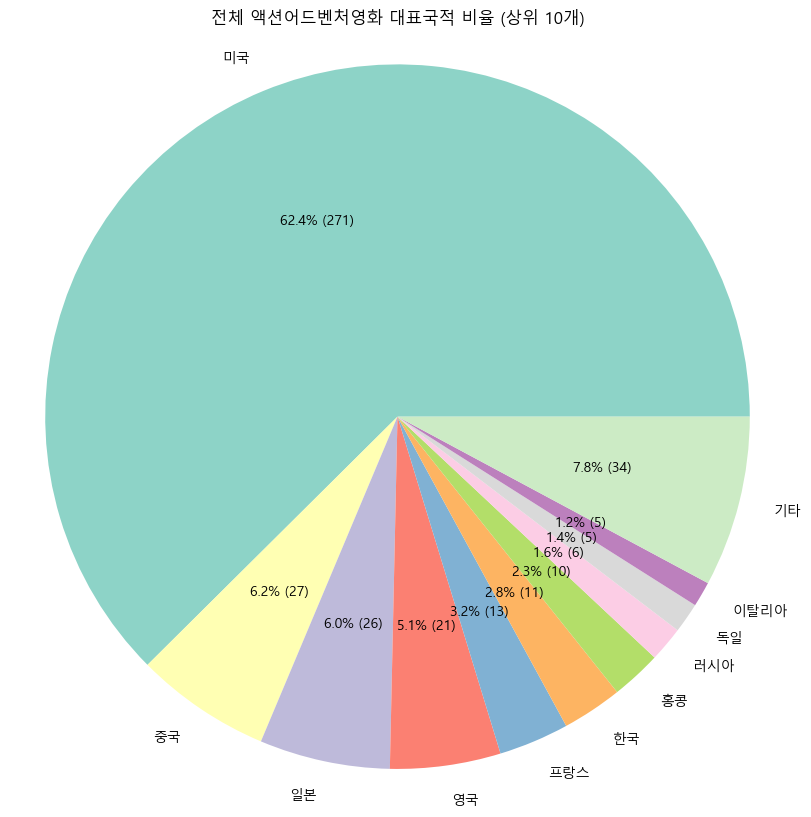

In [162]:
#어드벤처 
n_categories = 10  # 표시할 범주 개수

act_mv_counts = act_adv['대표국적'].value_counts()
top_categories = act_mv_adv_counts.head(n_categories)
other_category_count = act_mv_counts.sum() - top_categories.sum()
top_categories['기타'] = other_category_count

labels = top_categories.index.tolist()
colors= sns.color_palette('Set3')
plt.figure(figsize=(10, 10))
patches, _, autotexts = plt.pie(top_categories, labels=labels, colors= colors,autopct=lambda pct: f'{pct:.1f}% ({int(pct * sum(top_categories)/100)})')

plt.title('전체 액션어드벤처영화 대표국적 비율 (상위 {}개)'.format(n_categories))
plt.axis('equal')

plt.show()

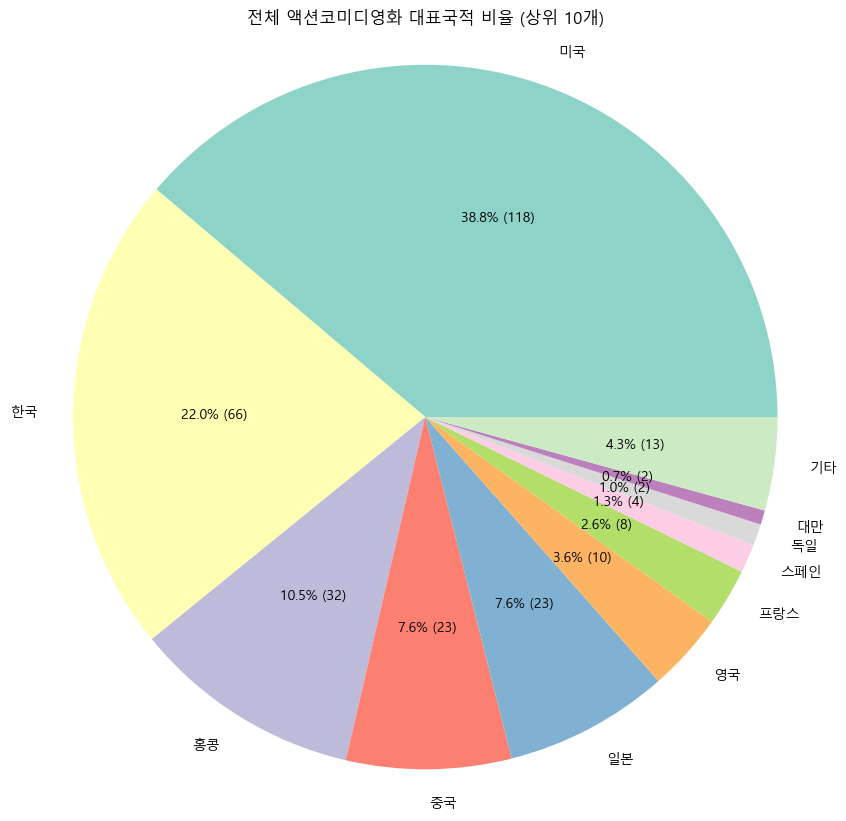

In [161]:
#코미디
n_categories = 10  # 표시할 범주 개수

act_mv_counts = act_comedy['대표국적'].value_counts()
top_categories = act_mv_counts.head(n_categories)
other_category_count = act_mv_counts.sum() - top_categories.sum()
top_categories['기타'] = other_category_count

labels = top_categories.index.tolist()
colors= sns.color_palette('Set3')
plt.figure(figsize=(10, 10))
patches, _, autotexts = plt.pie(top_categories, labels=labels, colors= colors,autopct=lambda pct: f'{pct:.1f}% ({int(pct * sum(top_categories)/100)})')

plt.title('전체 액션코미디영화 대표국적 비율 (상위 {}개)'.format(n_categories))
plt.axis('equal')

plt.show()

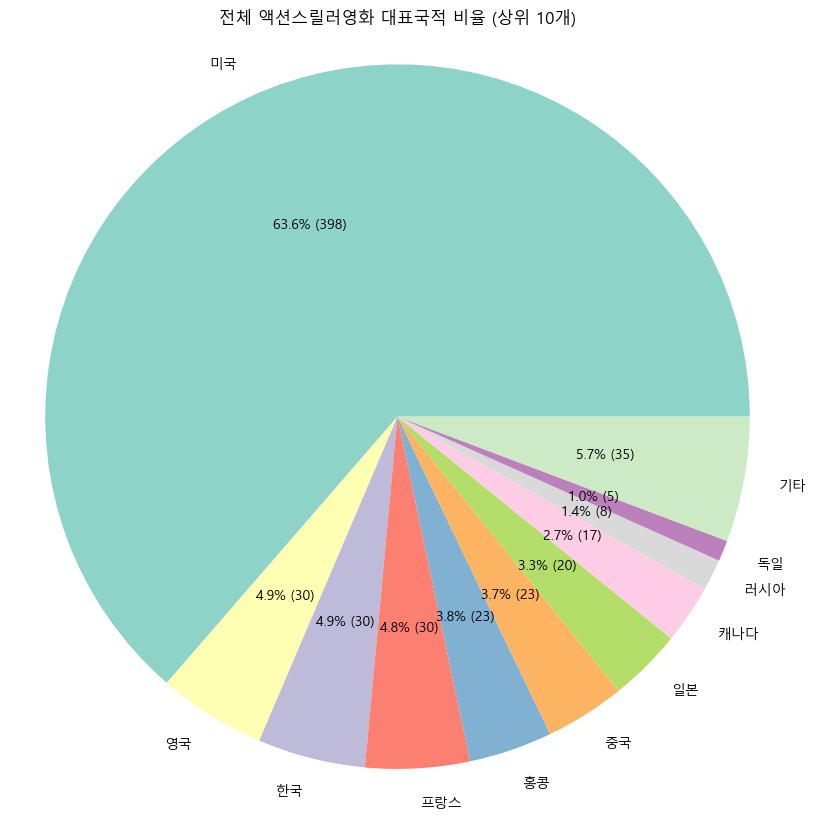

In [156]:
#스릴러
n_categories = 10  # 표시할 범주 개수

act_mv_counts = act_thriller['대표국적'].value_counts()
top_categories = act_mv_counts.head(n_categories)
other_category_count = act_mv_counts.sum() - top_categories.sum()
top_categories['기타'] = other_category_count

labels = top_categories.index.tolist()
colors= sns.color_palette('Set3')
plt.figure(figsize=(10, 10))
patches, _, autotexts = plt.pie(top_categories, labels=labels, colors= colors,autopct=lambda pct: f'{pct:.1f}% ({int(pct * sum(top_categories)/100)})')

plt.title('전체 액션스릴러영화 대표국적 비율 (상위 {}개)'.format(n_categories))
plt.axis('equal')

plt.show()

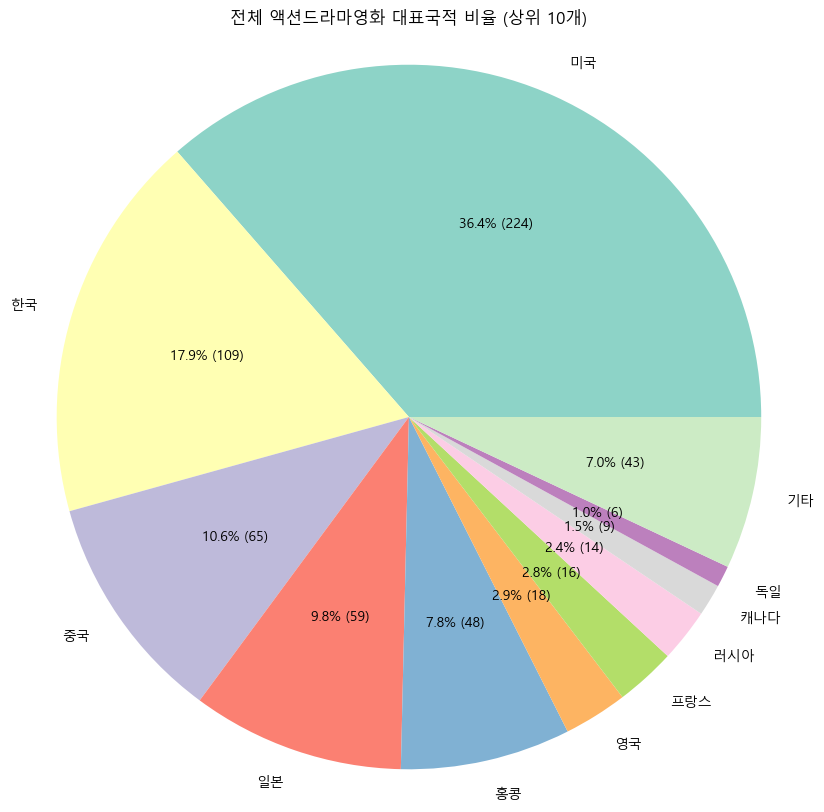

In [157]:
#드라마
n_categories = 10  # 표시할 범주 개수

act_mv_counts = act_drama['대표국적'].value_counts()
top_categories = act_mv_counts.head(n_categories)
other_category_count = act_mv_counts.sum() - top_categories.sum()
top_categories['기타'] = other_category_count

labels = top_categories.index.tolist()
colors= sns.color_palette('Set3')
plt.figure(figsize=(10, 10))
patches, _, autotexts = plt.pie(top_categories, labels=labels, colors= colors,autopct=lambda pct: f'{pct:.1f}% ({int(pct * sum(top_categories)/100)})')

plt.title('전체 액션드라마영화 대표국적 비율 (상위 {}개)'.format(n_categories))
plt.axis('equal')

plt.show()

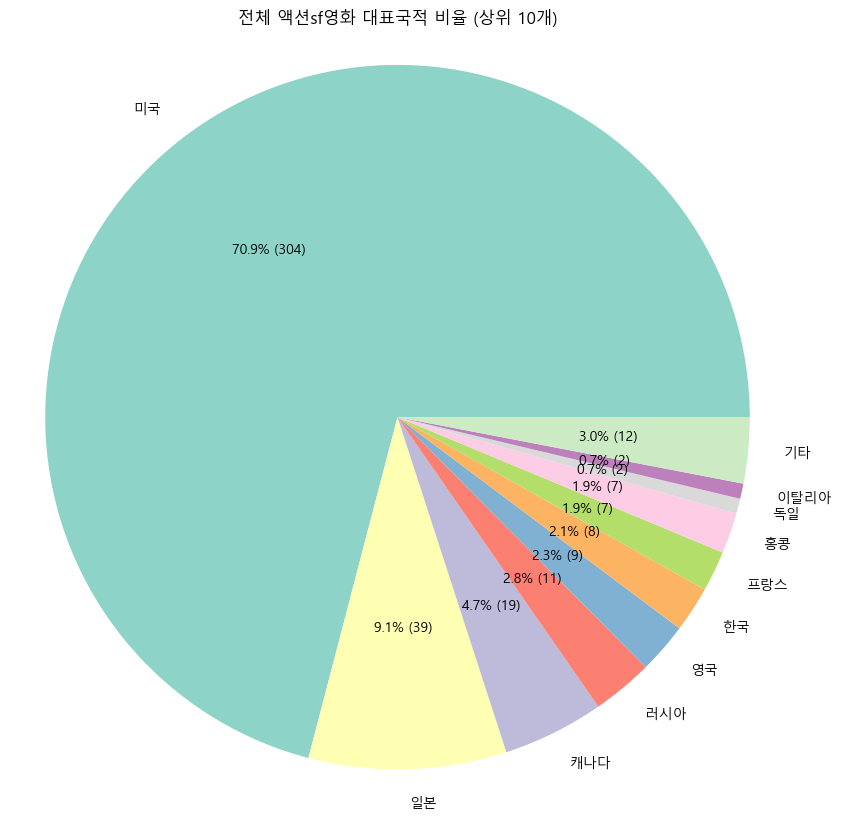

In [158]:
#sf
n_categories = 10  # 표시할 범주 개수

act_mv_counts = act_sf['대표국적'].value_counts()
top_categories = act_mv_counts.head(n_categories)
other_category_count = act_mv_counts.sum() - top_categories.sum()
top_categories['기타'] = other_category_count

labels = top_categories.index.tolist()
colors= sns.color_palette('Set3')
plt.figure(figsize=(10, 10))
patches, _, autotexts = plt.pie(top_categories, labels=labels, colors= colors,autopct=lambda pct: f'{pct:.1f}% ({int(pct * sum(top_categories)/100)})')

plt.title('전체 액션sf영화 대표국적 비율 (상위 {}개)'.format(n_categories))
plt.axis('equal')

plt.show()

In [ ]:
#흥행 액션 대표 국적 비율 

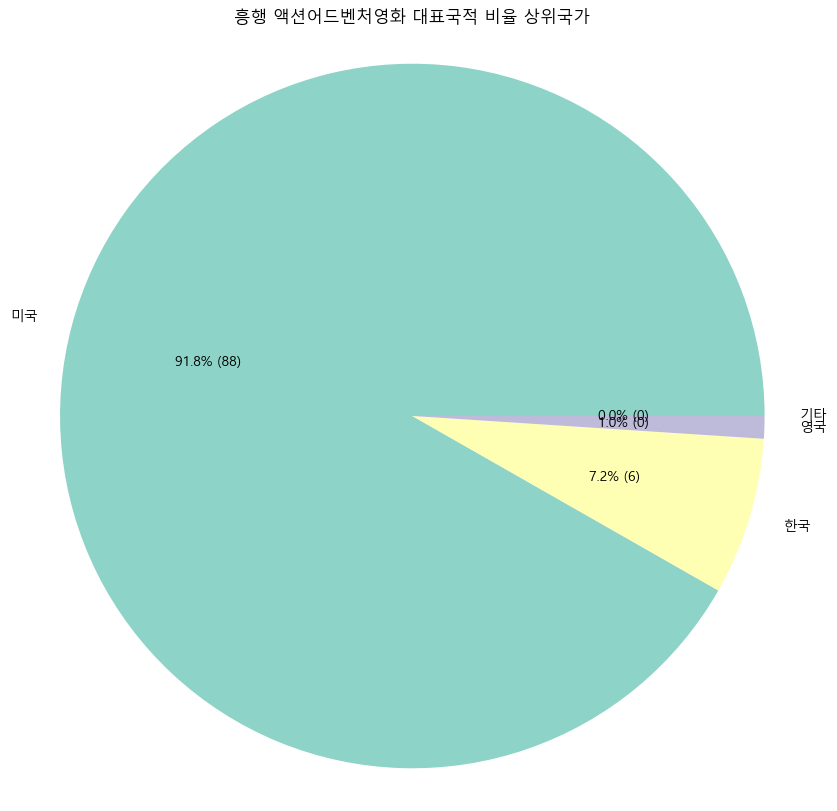

In [153]:
#흥행 어드벤처
n_categories = 10  # 표시할 범주 개수

act_mv_counts = act_adv2['대표국적'].value_counts()
top_categories = act_mv_counts.head(n_categories)
other_category_count = act_mv_counts.sum() - top_categories.sum()
top_categories['기타'] = other_category_count

labels = top_categories.index.tolist()
colors= sns.color_palette('Set3')
plt.figure(figsize=(10, 10))
patches, _, autotexts = plt.pie(top_categories, labels=labels, colors= colors,autopct=lambda pct: f'{pct:.1f}% ({int(pct * sum(top_categories)/100)})')

plt.title('흥행 액션어드벤처영화 대표국적 비율 상위국가')
plt.axis('equal')

plt.show()

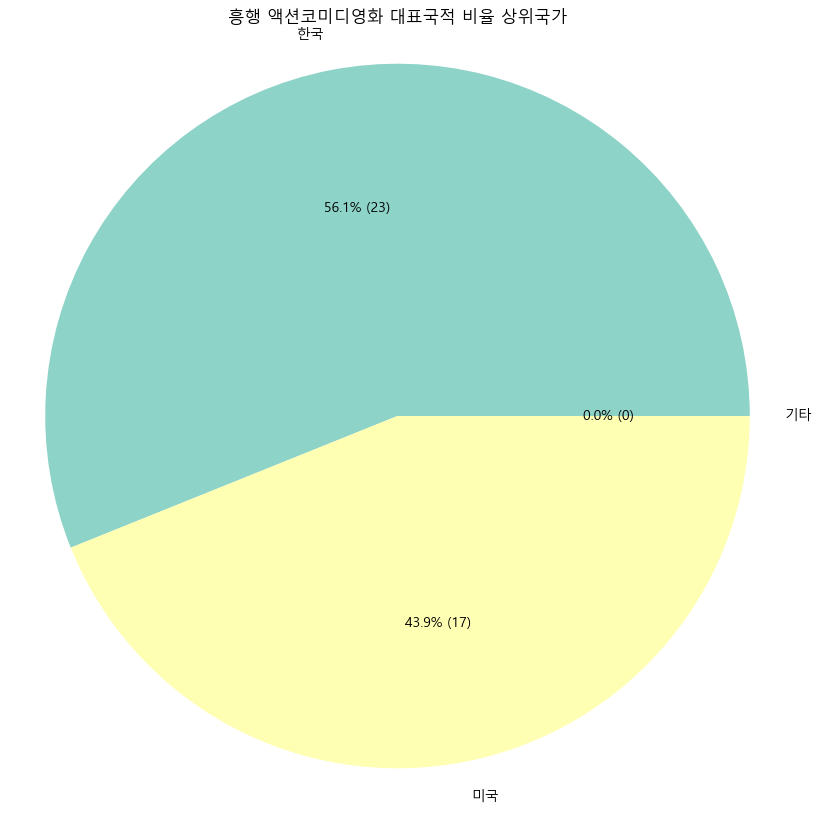

In [152]:
#흥행코미디
n_categories = 10  # 표시할 범주 개수

act_mv_counts = act_comedy2['대표국적'].value_counts()
top_categories = act_mv_counts.head(n_categories)
other_category_count = act_mv_counts.sum() - top_categories.sum()
top_categories['기타'] = other_category_count

labels = top_categories.index.tolist()
colors= sns.color_palette('Set3')
plt.figure(figsize=(10, 10))
patches, _, autotexts = plt.pie(top_categories, labels=labels, colors= colors,autopct=lambda pct: f'{pct:.1f}% ({int(pct * sum(top_categories)/100)})')

plt.title('흥행 액션코미디영화 대표국적 비율 상위국가')
plt.axis('equal')

plt.show()

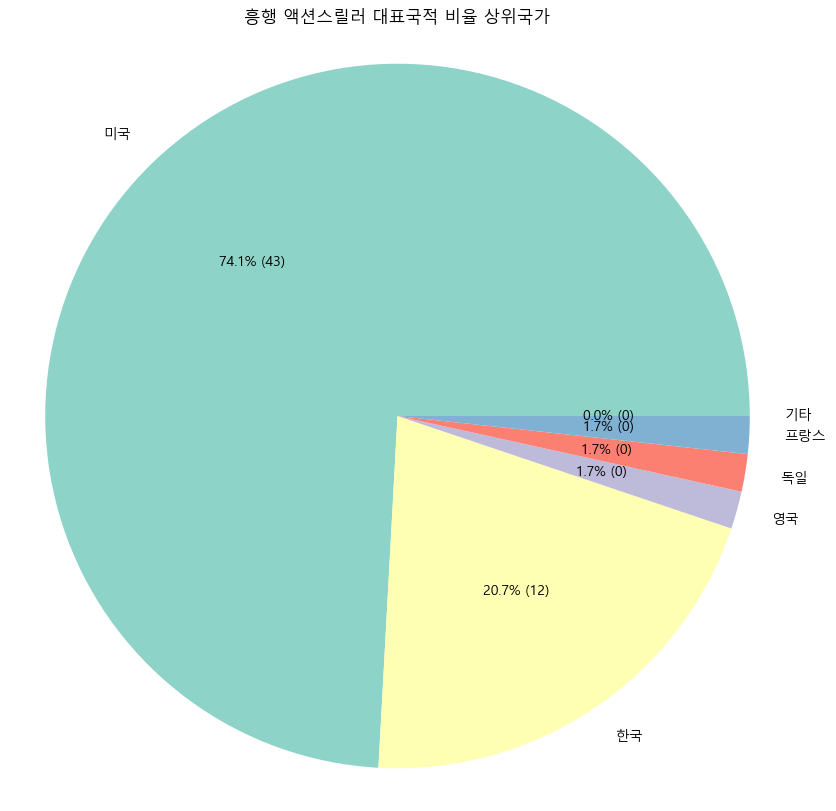

In [151]:
#흥행 스릴러
n_categories = 10  # 표시할 범주 개수

act_mv_counts = act_thriller2['대표국적'].value_counts()
top_categories = act_mv_counts.head(n_categories)
other_category_count = act_mv_counts.sum() - top_categories.sum()
top_categories['기타'] = other_category_count

labels = top_categories.index.tolist()
colors= sns.color_palette('Set3')
plt.figure(figsize=(10, 10))
patches, _, autotexts = plt.pie(top_categories, labels=labels, colors= colors,autopct=lambda pct: f'{pct:.1f}% ({int(pct * sum(top_categories)/100)})')

plt.title('흥행 액션스릴러 대표국적 비율 상위국가')
plt.axis('equal')

plt.show()

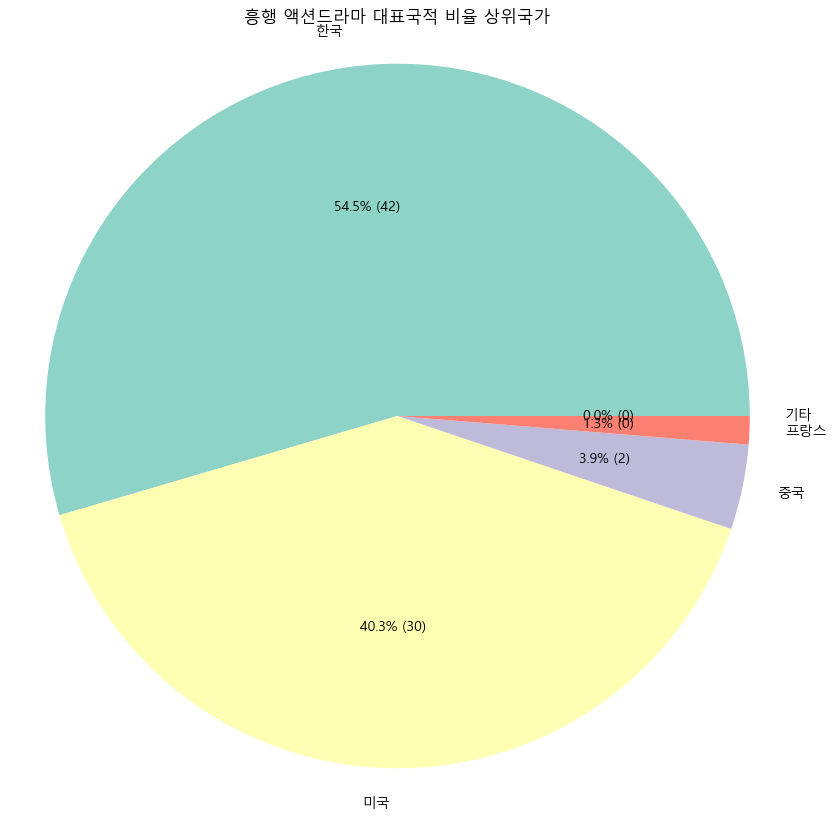

In [150]:
#흥행 드라마
n_categories = 10  # 표시할 범주 개수

act_mv_counts = act_drama2['대표국적'].value_counts()
top_categories = act_mv_counts.head(n_categories)
other_category_count = act_mv_counts.sum() - top_categories.sum()
top_categories['기타'] = other_category_count

labels = top_categories.index.tolist()
colors= sns.color_palette('Set3')
plt.figure(figsize=(10, 10))
patches, _, autotexts = plt.pie(top_categories, labels=labels, colors= colors,autopct=lambda pct: f'{pct:.1f}% ({int(pct * sum(top_categories)/100)})')

plt.title('흥행 액션드라마 대표국적 비율 상위국가')
plt.axis('equal')

plt.show()

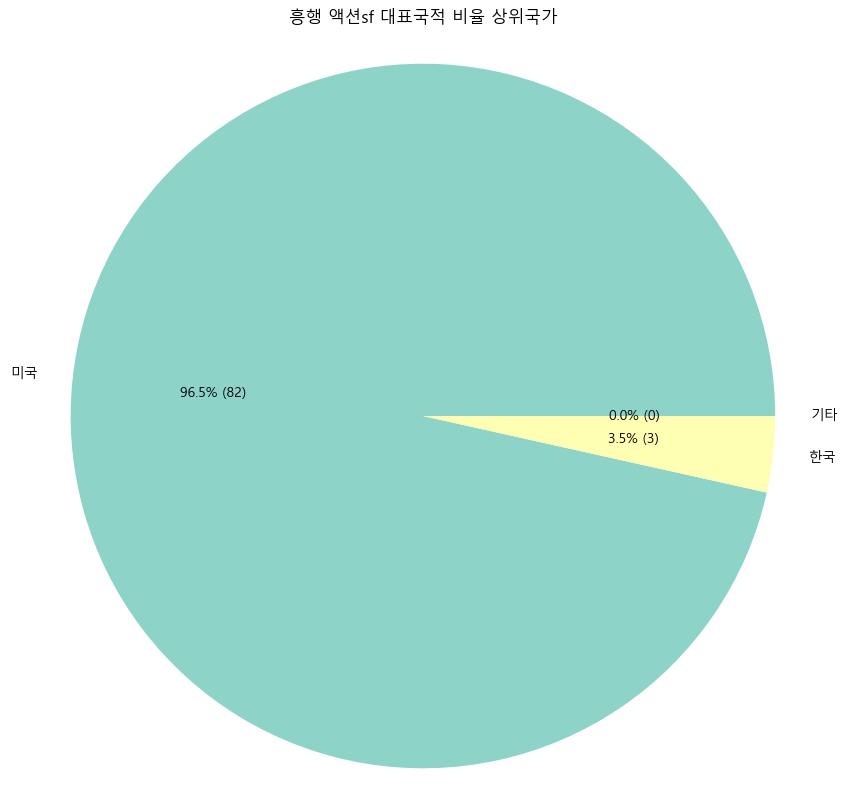

In [149]:
#흥행 액션 sf
n_categories = 10  # 표시할 범주 개수

act_mv_counts = act_sf2['대표국적'].value_counts()
top_categories = act_mv_counts.head(n_categories)
other_category_count = act_mv_counts.sum() - top_categories.sum()
top_categories['기타'] = other_category_count

labels = top_categories.index.tolist()
colors= sns.color_palette('Set3')
plt.figure(figsize=(10, 10))
patches, _, autotexts = plt.pie(top_categories, labels=labels, colors= colors,autopct=lambda pct: f'{pct:.1f}% ({int(pct * sum(top_categories)/100)})')

plt.title('흥행 액션sf 대표국적 비율 상위국가')
plt.axis('equal')

plt.show()

In [ ]:
act_comedy

In [ ]:
 def get_actor_list(movies, genre):
    movies_genre = movies[movies['장르'].str.contains(genre,na=False)]
    df_actors_v2 = movies_genre[:]
    df_actors_v2['배우List'] = df_actors_v2['배우 '].apply(lambda x : str(x).split(','))
    df_actors_explode_v2 = df_actors_v2.explode(column=['배우List'],ignore_index=True)
    df_group_actor_movie = df_actors_explode_v2.groupby('배우List')['영화명'].apply(list).reset_index(name='영화목록')
    df_group_actor_movie['영화촬영개수'] = df_group_actor_movie['영화목록'].apply(lambda x : len(x))
    df_gp_actor = df_group_actor_movie.sort_values('영화촬영개수', ascending = False)
    return df_gp_actor

In [ ]:
#전체 영화 top 배우

In [ ]:
mv_stars_action_comedy = get_actor_list(mv_all_gp,'코미디')
mv_stars_action_comedy

In [ ]:
mv_stars_action_adv = get_actor_list(mv_all_gp,'어드벤처')
mv_stars_action_adv

In [ ]:
mv_stars_action_thriller = get_actor_list(mv_all_gp,'스릴러')
mv_stars_action_thriller

In [ ]:
mv_stars_action_drama = get_actor_list(mv_all_gp,'드라마')
mv_stars_action_drama

In [ ]:
#흥행 영화 top 배우

In [ ]:
mv_stars_action_comedy2 = get_actor_list(mv_million_gp,'코미디')
mv_stars_action_comedy2

In [ ]:
mv_stars_action_adv2 = get_actor_list(mv_million_gp,'어드벤처')
mv_stars_action_adv2
mv_stars_action_adv2.to_csv('어드벤처 히트배우.csv',encoding='cp949')

In [ ]:
mv_stars_action_thriller2 = get_actor_list(mv_million_gp,'스릴러')
mv_stars_action_thriller2

In [ ]:
mv_stars_action_drama2 = get_actor_list(mv_million_gp,'드라마')
mv_stars_action_drama2

# 연간 백만 배우 순위 비교 

In [ ]:
#코미디
mv_stars_action_comedy2_2003 = get_actor_list(mv_million_gp_2003,'코미디')
mv_stars_action_comedy2_2003.to_csv('코미디 히트배우2003.csv',encoding='cp949')

In [ ]:
mv_stars_action_comedy2_2008 = get_actor_list(mv_million_gp_2008,'코미디')
mv_stars_action_comedy2_2008.to_csv('코미디 히트배우2008.csv',encoding='cp949')

In [ ]:
mv_stars_action_comedy2_2013 = get_actor_list(mv_million_gp_2013,'코미디')
mv_stars_action_comedy2_2013.to_csv('코미디 히트배우2013.csv',encoding='cp949')

In [ ]:
mv_stars_action_comedy2_2018 = get_actor_list(mv_million_gp_2018,'코미디')
mv_stars_action_comedy2_2018.to_csv('코미디 히트배우2018.csv',encoding='cp949')

In [ ]:
#스릴러
mv_stars_action_thriller2_2003 = get_actor_list(mv_million_gp_2003,'스릴러')
mv_stars_action_thriller2_2003

In [ ]:
mv_stars_action_thriller2_2008 = get_actor_list(mv_million_gp_2008,'스릴러')
mv_stars_action_thriller2_2008

In [ ]:
mv_stars_action_thriller2_2013 = get_actor_list(mv_million_gp_2013,'스릴러')
mv_stars_action_thriller2_2013

In [ ]:
mv_stars_action_thriller2_2018 = get_actor_list(mv_million_gp_2018,'스릴러')
mv_stars_action_thriller2_2018

In [ ]:
mv_stars_action_adv2_2003 = get_actor_list(mv_million_gp_2003,'어드벤처')
mv_stars_action_adv2_2003

In [ ]:
mv_stars_action_adv2_2008 = get_actor_list(mv_million_gp_2008,'어드벤처')
mv_stars_action_adv2_2008

In [ ]:
mv_stars_action_adv2_2013 = get_actor_list(mv_million_gp_2013,'어드벤처')
mv_stars_action_adv2_2013

In [ ]:
mv_stars_action_adv2_2018 = get_actor_list(mv_million_gp_2018,'어드벤처')
mv_stars_action_adv2_2018

In [ ]:
mv_stars_action_drama2_2003 = get_actor_list(mv_million_gp_2003,'드라마')
mv_stars_action_drama2_2003

In [ ]:
mv_stars_action_drama2_2008 = get_actor_list(mv_million_gp_2008,'드라마')
mv_stars_action_drama2_2008

In [ ]:
mv_stars_action_drama2_2013 = get_actor_list(mv_million_gp_2013,'드라마')
mv_stars_action_drama2_2013

In [ ]:
mv_stars_action_drama2_2018 = get_actor_list(mv_million_gp_2018,'드라마')
mv_stars_action_drama2_2018